In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)
import missingno as msno

In [2]:
df_fintech=pd.read_csv("/Users/karimsalah/Documents/Diploma/DE/fintech_data_1_62_01554.csv")
df_fintech1=df_fintech.copy()

<Axes: >

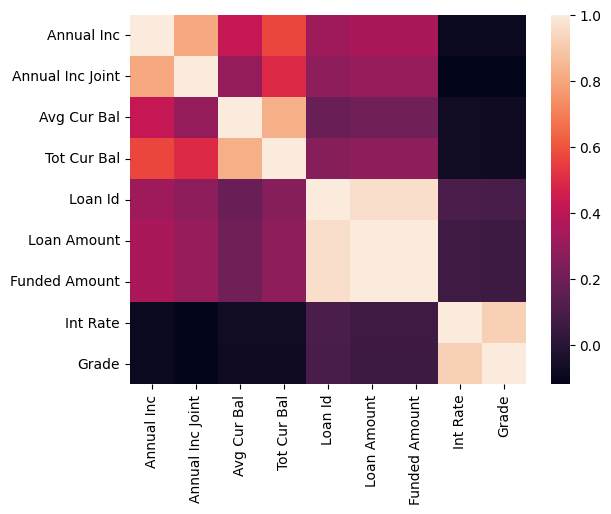

In [3]:
df_fintech_num=df_fintech.select_dtypes(include=['number'])
sns.heatmap(df_fintech_num.corr())

In [4]:
df_fintech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27030 entries, 0 to 27029
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Id          27030 non-null  object 
 1   Emp Title            24635 non-null  object 
 2   Emp Length           25143 non-null  object 
 3   Home Ownership       27030 non-null  object 
 4   Annual Inc           27030 non-null  float64
 5   Annual Inc Joint     1822 non-null   float64
 6   Verification Status  27030 non-null  object 
 7   Zip Code             27030 non-null  object 
 8   Addr State           27030 non-null  object 
 9   Avg Cur Bal          27030 non-null  int64  
 10  Tot Cur Bal          27030 non-null  int64  
 11  Loan Id              27030 non-null  int64  
 12  Loan Status          27030 non-null  object 
 13  Loan Amount          27030 non-null  int64  
 14  State                27030 non-null  object 
 15  Funded Amount        27030 non-null 

# **Data Cleaning**
This section prepares the data using below  functions:








df_fintech.head()

In [5]:
#Renaming columns and setting index 

def renamecol_index(df):
#     make all cols lower case
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    df.set_index(['customer_id','loan_id'], inplace=True)
    # Iterate through the column names and replace space with underscore,
    # Then setting two columns as index customer_id and loan_id as they are two unique columns with unique id for customer and loan related to each customer. 

renamecol_index(df_fintech) #Renaming all columns using function 


In [6]:
df_fintech.head()

,,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description
customer_id,loan_id,,,,,,,,,,,,,,,,,,,,,,
YidnPSlceGVjXHgwM1x4MTVceGIwXHg4Y1x4ZTdceGMyXHhhM1x4MDEvXHg5MFx4ODFceGZiXHhlNlx4YTNceGE2XHhlODpceDhmc1x4YWVaMFx4YjZAXHhlZWBceGM1UCc=,178505,Diagnostic Ultrasonographer,10+ years,MORTGAGE,105000.0,NaN,Source Verified,760xx,TX,10912,218231,Fully Paid,18000,TX,18000,36 months,0.1359,14,17-Jun-17,False,Individual,debt_consolidation,Debt consolidation
YidceDE1XHhiY1x4YWZceGEwXHgwMVx4YWZceGRiVFx4ZWZceGM3O1x4YWRyXHgxYlx4OWNceDkwXHhjMkY4XHgxM11QXHgwN3VceGIzXHgwZUstXHhhYVx4ZDNceDA4XHg4ZSc=,98510,Analyst,3 years,RENT,78000.0,NaN,Verified,633xx,MO,8440,109721,Current,10000,MO,10000,36 months,0.1894,20,18-Jul-18,False,Individual,credit_card,Credit card refinancing
YidceDFhXHhjMHopXHg4OFx4ZTVceDExT1x4OGJceDkzd0FceGQ4UVx4YmEhXHgxM1x4YTZceGQ3XHgwNVx4ZmVeLlx4OTFceGE4XHg4Mlx4ZmZceGEyclx4ZjlceDhmXHhjNCc=,166377,facilities tech,3 years,RENT,72000.0,NaN,Source Verified,140xx,NY,5108,35754,Current,16000,NY,16000,60 months,NaN,7,16-Sep-16,False,INDIVIDUAL,credit_card,Credit card refinancing
YictXHgwM1x4MTVceDgyXHg5MFx4MTZceGZmKFx4ZGM/UylceDk2XHhhMixceDA1XHgxYlx4YTlceGRkeVx4ZGFaXHhhM1x4OWRceDE1XHhhM3xceDg1TVx4N2ZqdSc=,90454,Pastor,4 years,MORTGAGE,62500.0,NaN,Not Verified,180xx,PA,35730,178652,Current,10000,PA,10000,36 months,0.1091,6,17-May-17,False,Individual,credit_card,Credit card refinancing
YidceGQ1XHhmMU9jO1x4YjdceGI4Slx4YTFSXHhmMlx4ZmViN1x4YWRccihceGRjXHhiNVx4ZDVceGEyQVx4OGY9Olx4MTRccko1XHgxNlx4ZTFceGI5Jw==,86907,NaN,< 1 year,RENT,150000.0,168000.0,Not Verified,937xx,CA,1067,8534,Current,10000,CA,10000,36 months,0.0819,1,19-Aug-19,False,Joint App,credit_card,Credit card refinancing


#  First main function
 1. this function will work on 5 columns date as we need to transform date to a proper datatime format then sort data by date
 2. second column will work on is the emp length col to change it to numerical column only 
 3. third col will work on is the grade column by grouping them to another column
 4. term to change 36 months and 60 months to numeric
 5. standardize_type_column 



In [7]:
import pandas as pd
import numpy as np

def date_length_grade_term_StandardizedTypeColum_checkDuplicates_checkmissing(df, col1, col2, col3, col4, col5):
    """
    Standardizes and transforms date, employment length, grade, and term columns.
    Extracts the issue year from the date column and saves it to a new column.
    Checks for duplicates and missing values, and saves lookup tables for transformations.

    Args:
        df (pd.DataFrame): The input DataFrame.
        col1 (str): The column name for the issue date.
        col2 (str): The column name for employment length.
        col3 (str): The column name for grade.
        col4 (str): The column name for term.
        col5 (str): The column name for type.

    Returns:
        None
    """
    # Standardize the 'type' column
    look_Df_type = df[[col5]].copy()
    look_Df_type.rename(columns={col5: 'original_type_column'}, inplace=True)
    type_mapping = {
        'Individual': 'Individual',
        'INDIVIDUAL': 'Individual',
        'Joint App': 'Joint App',
        'JOINT': 'Joint App',
        'DIRECT_PAY': 'Direct Pay',
        'DIRECT PAY': 'Direct Pay'
    }
    df[col5] = df[col5].map(type_mapping).fillna(df[col5])
    look_Df_type['Standarized_type_column'] = df[col5]
    look_Df_type.to_csv('Standarized_type_column.csv', index=True)
    print("Standarized_type_column.csv saved.")

    # Ensure the issue date column is in datetime format
    df[col1] = pd.to_datetime(df[col1])

    # Extract the issue year and save it to a new column
    df['issue_year'] = df[col1].dt.year

    # Create a new column for the issue month
    df['issue_month'] = df[col1].dt.month

    # Sort by the issue date
    df.sort_values(by=[col1], inplace=True)

    # Create a lookup DataFrame for the issue date
    lookup_df = df[[col1, 'issue_month', 'issue_year']].copy()
    lookup_df.rename(columns={col1: 'transformed_issue_date'}, inplace=True)
    lookup_df['original_issue_date'] = df[col1].astype(str)
    lookup_df.to_csv('date_lookup_table.csv', index=False)
    print("Lookup table saved to date_lookup_table.csv")

    # Transform the employment length column
    lookup_df1 = df[[col2]].copy()
    lookup_df1.rename(columns={col2: 'original_emp_length'}, inplace=True)
    replacements = {'< 1 year': '1', '10+ years': '10'}
    df[col2] = df[col2].replace(replacements, regex=False)
    df[col2] = pd.to_numeric(
        df[col2].str.extract(r'(\d+\.?\d*)')[0],  # Extract numerical part
        errors='coerce'  # Convert invalid parsing to NaN
    )
    lookup_df1['emp_length_numeric'] = df[col2]
    lookup_df1.to_csv('emp_lengthTransformation_lookup.csv', index=False)
    print("Lookup table saved to emp_lengthTransformation_lookup.csv")

    # Transform the term column
    lookup_df3 = df[[col4]].copy()
    lookup_df3.rename(columns={col4: 'original_term'}, inplace=True)
    replacements1 = {'36 months': '36', '60 months': '60'}
    df[col4] = df[col4].replace(replacements1, regex=False)
    df[col4] = pd.to_numeric(
        df[col4].str.extract(r'(\d+\.?\d*)')[0],  # Extract numerical part
        errors='coerce'  # Convert invalid parsing to NaN
    )
    lookup_df3['Term_numeric'] = df[col4]
    lookup_df3.to_csv('term_numeric_lookup.csv', index=False)
    print("Lookup table saved to term_numeric_lookup.csv")

    # Group the grade column
    lookup_df2 = df[[col3]].copy()
    lookup_df2.rename(columns={col3: 'original_grade'}, inplace=True)
    Y = [
        (df[col3] >= 1) & (df[col3] <= 5),
        (df[col3] >= 6) & (df[col3] <= 10),
        (df[col3] >= 11) & (df[col3] <= 15),
        (df[col3] >= 16) & (df[col3] <= 20),
        (df[col3] >= 21) & (df[col3] <= 25),
        (df[col3] >= 26) & (df[col3] <= 30),
        (df[col3] >= 31) & (df[col3] <= 35)
    ]
    grouping = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
    df['grade_grouped'] = np.select(Y, grouping, default=None)
    lookup_df2['grades_grouped'] = df['grade_grouped']
    lookup_df2.to_csv('grade_lookup.csv', index=False)
    print("Lookup table saved to grade_lookup.csv")

    # Check for duplicates
    duplicates = df[df.duplicated(subset=None)]
    if not duplicates.empty:
        duplicates.to_csv('duplicate_rows_lookup.csv', index=False)
        print("Duplicate rows saved to duplicate_rows_lookup.csv")
    else:
        print("No duplicate rows found.")

    # Drop duplicates
    df.drop_duplicates(subset=None, inplace=True)

    # Check for missing values
    missing_counts = df.isnull().sum()
    missing_percentages = (missing_counts / len(df)) * 100
    missing_summary = pd.DataFrame({
        'Column': df.columns,
        'Missing Values': missing_counts,
        'Percentage (%)': missing_percentages
    })
    missing_summary = missing_summary[missing_summary['Missing Values'] > 0]

    if not missing_summary.empty:
        missing_summary.to_csv('missing_values_lookup.csv', index=False)
        print("Missing values lookup table saved to missing_values_lookup.csv")
    else:
        print("No missing values found.")

    print(missing_summary)

# Example usage
# Assuming df_fintech contains the required columns
date_length_grade_term_StandardizedTypeColum_checkDuplicates_checkmissing(df_fintech, 'issue_date', 'emp_length', 'grade', 'term', 'type')

Standarized_type_column.csv saved.
Lookup table saved to date_lookup_table.csv
Lookup table saved to emp_lengthTransformation_lookup.csv
Lookup table saved to term_numeric_lookup.csv
Lookup table saved to grade_lookup.csv
No duplicate rows found.
Missing values lookup table saved to missing_values_lookup.csv
                            Column  Missing Values  Percentage (%)
emp_title                emp_title            2395        8.860525
emp_length              emp_length            1887        6.981132
annual_inc_joint  annual_inc_joint           25208       93.259341
int_rate                  int_rate            1184        4.380318
description            description             237        0.876804


/var/folders/xt/0l9mqwh56cvdq97mqqhsq9c80000gn/T/ipykernel_17819/402428519.py:38: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col1] = pd.to_datetime(df[col1])


In [8]:
df_fintech.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 27030 entries, ('YichXHg4OVx4MDMuXHgwYi9RXHhkY1x4MGZ3QFx4OTJceGUxXHg5NmJceGJkXHhjZVx4OWZceGE4XHhjMSJ4XHg5OFx4ZmFceGI0XHhiZHppJDdceDEyNyc=', np.int64(35662)) to ('YidceDFmXHgxZm5hZlx4OTNceDk3XHgwN1x4MTFceDA4SFx4YjFceDAxXHhkOCpceGE0XHhmY31ceGYzXHgxM2dceGU5XHg5OEM8Y1x4N2Y7XHhiMFx4ODRcblx4OWMn', np.int64(265260))
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   emp_title            24635 non-null  object        
 1   emp_length           25143 non-null  float64       
 2   home_ownership       27030 non-null  object        
 3   annual_inc           27030 non-null  float64       
 4   annual_inc_joint     1822 non-null   float64       
 5   verification_status  27030 non-null  object        
 6   zip_code             27030 non-null  object        
 7   addr_state           27030 non-null  object        
 8   avg_cur_bal          27030 non-

# Key Advantages of the Annual_income_EDA Function
1. Comprehensive Analysis of Annual Income:
    Calculates and prints key statistics (mean, median, mode, min, max, top 10 largest/smallest values) for the annual income column, providing a detailed overview of the data distribution.
2. Dynamic Income Grouping:
    Categorizes income into meaningful groups (Lower_Class, Working_Class, etc.) based on pre-defined thresholds, enabling deeper insights into income segmentation.
3. Lookup Table Creation:
    Saves a lookup table mapping original annual income values to their corresponding income group, ensuring traceability and allowing for reversibility of encoding or grouping.
4. Percentage Calculation:
    Calculates and prints the percentage distribution of each income group in the dataset, giving an overview of group representation.
5. Categorical Column Integration:
    Analyzes the relationship between income groups and a specified categorical column (e.g., home_ownership), providing counts and percentages of each category within each income group.
6. Additional Lookup Table for Categorical Analysis:
    Saves a separate CSV file summarizing the percentage distribution of the categorical column within each income group for later use or reversibility.
7. Advanced Visualizations:
    Creates:
    A histogram to display the distribution of income groups.
    A bar plot showing the percentage distribution of a categorical column across income groups.
    These visualizations make it easier to interpret the data patterns and relationships.
8. Parameterization for Reusability:
    Accepts both the column to analyze (col) and the categorical column (categorical_col) as parameters, making the function reusable for different datasets and analyses.





 # **what is the percentage of home ownership at every Annual income Class and what is the indication could we get related to loan purpose from it  ?**

Annual income median: 67000.0
Annual income mean: 79771.0
Annual income mode: 60000.0
Annual income Max: 3000000.0
Annual income Min: 34.0
Annual income Max 5 values: [3000000.0, 2568000.0, 2150000.0, 2000000.0, 1750000.0, 1200000.0, 1200000.0, 1200000.0, 1000000.0, 1000000.0]
Annual income Min 5 values: [34.0, 1000.0, 1000.0, 1200.0, 2000.0, 2000.0, 4000.0, 4100.0, 4500.0, 5000.0]

Percentage of each income group from the total dataset:
Lower_Class: 9.51%
Working_Class: 30.16%
Lower_Middle_Class: 37.22%
Upper_Middle_Class: 19.96%
Upper_Class: 2.95%
Top_1%: 0.19%
home_ownership
MORTGAGE    13289
RENT        10573
OWN          3131
ANY            36
OTHER           1
Name: count, dtype: int64

Income group percentages saved to 'income_group_percentages.csv'.


/var/folders/xt/0l9mqwh56cvdq97mqqhsq9c80000gn/T/ipykernel_17819/2404295570.py:69: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data=df, x='annual_income_grouped', palette='Set2', discrete=True)


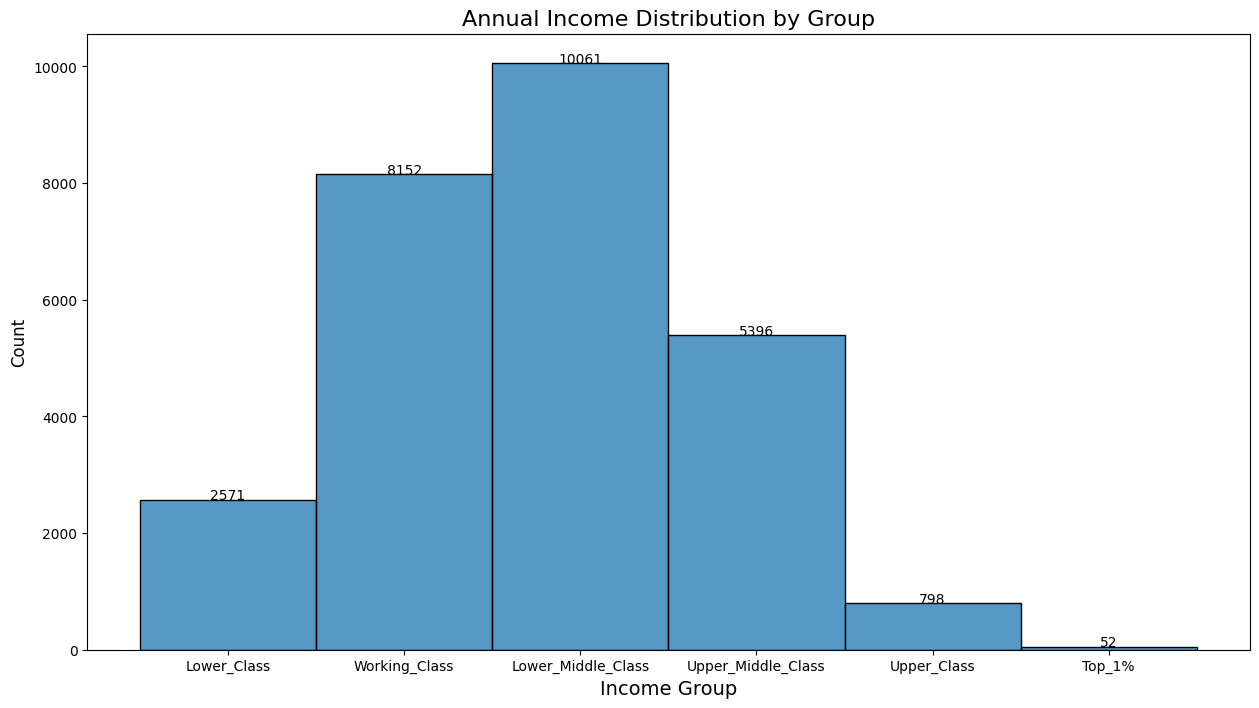


Counts of each homeowner group in each annual income class:

Income Group: Lower_Class
  RENT: 1459
  MORTGAGE: 662
  OWN: 446
  ANY: 4
  OTHER: 0

Income Group: Working_Class
  RENT: 3943
  MORTGAGE: 3139
  OWN: 1055
  ANY: 15
  OTHER: 0

Income Group: Lower_Middle_Class
  MORTGAGE: 5395
  RENT: 3605
  OWN: 1048
  ANY: 12
  OTHER: 1

Income Group: Upper_Middle_Class
  MORTGAGE: 3521
  RENT: 1383
  OWN: 488
  ANY: 4
  OTHER: 0

Income Group: Upper_Class
  MORTGAGE: 539
  RENT: 175
  OWN: 83
  ANY: 1
  OTHER: 0

Income Group: Top_1%
  MORTGAGE: 33
  OWN: 11
  RENT: 8
  ANY: 0
  OTHER: 0


/var/folders/xt/0l9mqwh56cvdq97mqqhsq9c80000gn/T/ipykernel_17819/2404295570.py:91: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('annual_income_grouped')[categorical_col]
/var/folders/xt/0l9mqwh56cvdq97mqqhsq9c80000gn/T/ipykernel_17819/2404295570.py:99: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for income_group, group_data in Annual_income_ownership1.groupby('annual_income_grouped'):
/var/folders/xt/0l9mqwh56cvdq97mqqhsq9c80000gn/T/ipykernel_17819/2404295570.py:106: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observe

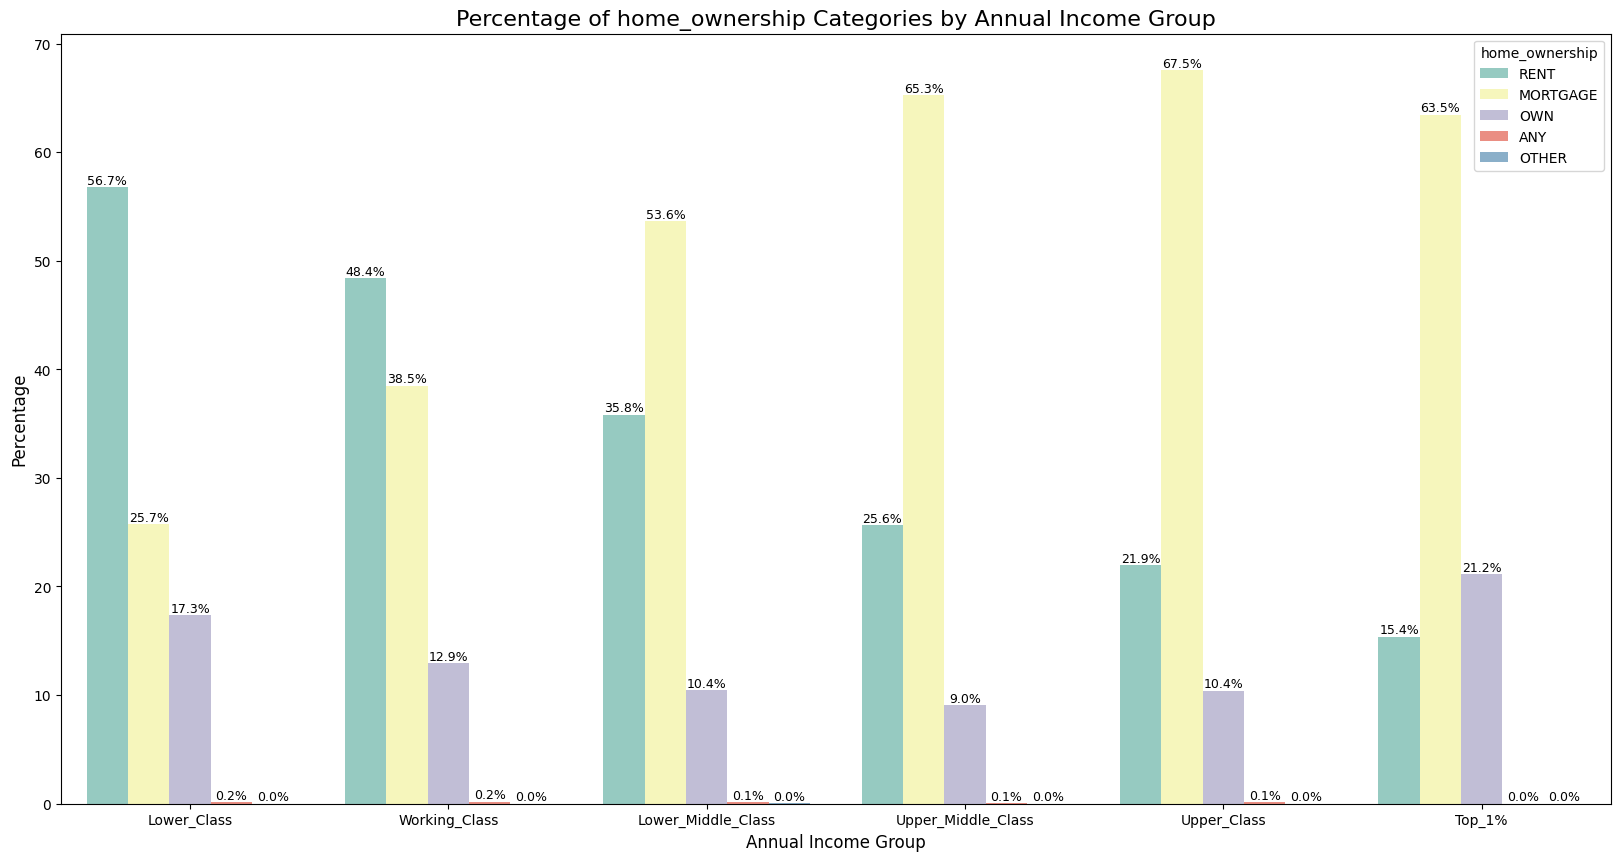

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def Annual_income_EDA(df, col, categorical_col):
    lookup_df = df[[col]].copy()
    lookup_df.rename(columns={col: 'original_annual_income'}, inplace=True)

    # Calculate basic statistics
    mean_annual_inc = df[col].mean()
    median_annual_inc = df[col].median()
    mode_annual_inc = df[col].mode()[0]
    max_annual_inc = df[col].max()
    min_annual_inc = df[col].min()
    max_annual_inc_3 = df[col].nlargest(10).tolist()
    min_annual_inc_3 = df[col].nsmallest(10).tolist()

    # Print statistics
    print("Annual income median:", median_annual_inc.round())
    print("Annual income mean:", mean_annual_inc.round())
    print("Annual income mode:", mode_annual_inc.round())
    print("Annual income Max:", max_annual_inc)
    print("Annual income Min:", min_annual_inc)
    print("Annual income Max 5 values:", max_annual_inc_3)
    print("Annual income Min 5 values:", min_annual_inc_3)

    # Create income groups
    Y = [
        (df[col] >= 0) & (df[col] < 35000),
        (df[col] >= 35000) & (df[col] < 60000),
        (df[col] >= 60000) & (df[col] < 100000),
        (df[col] >= 100000) & (df[col] < 200000),
        (df[col] >= 200000) & (df[col] < 500000),
        (df[col] >= 500000) & (df[col] <= 3000000)
    ]
    grouping = ['Lower_Class', 'Working_Class', 'Lower_Middle_Class', 
                'Upper_Middle_Class', 'Upper_Class', 'Top_1%']
    df['annual_income_grouped'] = np.select(Y, grouping, default=None)
    df['annual_income_grouped'] = pd.Categorical(df['annual_income_grouped'], categories=grouping, ordered=True)
    
    # Save lookup table
    lookup_df['annual_income_grouped'] = df['annual_income_grouped']
    lookup_df.to_csv('annual_income_lookupTable.csv', index=False)

    # Calculate percentage of each income group
    income_group_counts = df['annual_income_grouped'].value_counts(normalize=False).sort_index()
    income_group_percentages = df['annual_income_grouped'].value_counts(normalize=True).sort_index() * 100

    # Print percentages
    print("\nPercentage of each income group from the total dataset:")
    for group, percentage in zip(grouping, income_group_percentages):
        print(f"{group}: {percentage:.2f}%")
    
    # Optional: Save the percentages to a CSV file
    percentage_df = pd.DataFrame({
        'Income Group': grouping,
        'Count': income_group_counts.values,
        'Percentage': income_group_percentages.values
    })
    percentage_df.to_csv('income_group_percentages.csv', index=False)

    print(df_fintech['home_ownership'].value_counts())
    
    print("\nIncome group percentages saved to 'income_group_percentages.csv'.")

    # Create the histogram with larger size
    plt.figure(figsize=(15, 8))
    ax = sns.histplot(data=df, x='annual_income_grouped', palette='Set2', discrete=True)

    # Add count labels above each bar
    for bar, count in zip(ax.patches, income_group_counts):
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # x position
            bar.get_height() + 1,  # y position (slightly above the bar)
            f"{count}",  # Label
            ha='center', fontsize=10, color='black'
        )

    # Set plot titles and labels
    plt.title('Annual Income Distribution by Group', fontsize=16)
    plt.xlabel('Income Group', fontsize=14)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

    # Analyze and print the categorical column if provided
    if categorical_col in df.columns:
        Annual_income_ownership1 = (
            df.groupby('annual_income_grouped')[categorical_col]
            .value_counts(normalize=False)  # Get counts
            .rename('count')
            .reset_index()
        )

        # Print the counts for each group
        print("\nCounts of each homeowner group in each annual income class:")
        for income_group, group_data in Annual_income_ownership1.groupby('annual_income_grouped'):
            print(f"\nIncome Group: {income_group}")
            for index, row in group_data.iterrows():
                print(f"  {row[categorical_col]}: {row['count']}")

        # Add percentage calculations
        Annual_income_ownership1['percentage'] = (
            Annual_income_ownership1.groupby('annual_income_grouped')['count']
            .transform(lambda x: x / x.sum() * 100)
        )

        # Save the categorical analysis
        Annual_income_ownership1.to_csv(f'{categorical_col}_income_group_analysis.csv', index=False)

        # Plot the categorical column percentages only
        plt.figure(figsize=(20, 10))
        ax = sns.barplot(
            data=Annual_income_ownership1, 
            x='annual_income_grouped', 
            y='percentage', 
            hue=categorical_col,
            palette='Set3'
        )

        # Add percentage labels above bars
        for bar in ax.containers:
            ax.bar_label(bar, fmt='%.1f%%', fontsize=9, label_type='edge')

        plt.title(f'Percentage of {categorical_col} Categories by Annual Income Group', fontsize=16)
        plt.ylabel('Percentage', fontsize=12)
        plt.xlabel('Annual Income Group', fontsize=12)
        plt.legend(title=categorical_col, fontsize=10)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.show()
    else:
        print(f"Categorical column '{categorical_col}' not found in the dataset. Skipping related analysis.")
Annual_income_EDA(df_fintech, 'annual_inc', 'home_ownership')

**As shown as annual income group class go higher the percentage of rent home decrease while Mortgage increase so that's indicates that the purpose of loan Home improvement % at higher classes will increase and this will be investigated in the upcoming functions**


In [10]:
df_fintech['purpose'].value_counts()


purpose
debt_consolidation    15170
credit_card            6395
home_improvement       1790
other                  1682
major_purchase          576
medical                 314
small_business          295
car                     266
house                   181
vacation                180
moving                  159
renewable_energy         14
wedding                   8
Name: count, dtype: int64

# **Key Advantages of loan_purpose_analysis function** :
1. Comprehensive Analysis:
The function calculates both counts and percentages for each loan purpose within each income group, providing a detailed breakdown of loan distribution.
2. Identifies Key Insights:
It identifies the income group with the highest total loan counts, highlighting where the largest concentration of loans exists. This can be critical for decision-making and targeting specific income groups.
3. Data Visualization:
The function generates two bar plots:
A count-based bar chart for understanding the raw distribution of loan purposes.
A percentage-based bar chart for proportional comparisons within each income group.
Both charts are enhanced with labels above the bars for improved readability.
4. Exportable Results:
All the analysis (counts and percentages) is saved into a CSV file (loan_purpose_income_group_analysis.csv) for further use or reporting, ensuring reproducibility and easy sharing of results.
5. Customization:
The function allows flexibility in specifying the income group column and loan purpose column, making it adaptable to different datasets with varying column names.
6. Improved Decision-Making:
By understanding the distribution and proportions of loan purposes across income groups, stakeholders can tailor financial products or strategies to meet the needs of different customer segments.




# *What is the loan purpose percentage for each annual income class group ?*

/var/folders/xt/0l9mqwh56cvdq97mqqhsq9c80000gn/T/ipykernel_17819/2125307504.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(income_group_col)[loan_purpose_col]
/var/folders/xt/0l9mqwh56cvdq97mqqhsq9c80000gn/T/ipykernel_17819/2125307504.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_purpose_counts.groupby(income_group_col)['count']
/var/folders/xt/0l9mqwh56cvdq97mqqhsq9c80000gn/T/ipykernel_17819/2125307504.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or obser


The income group with the highest total loans is 'Lower_Middle_Class' with 10061 loans.

Counts and percentages of each loan purpose in each annual income group:

Income Group: Lower_Class
  debt_consolidation: 1399 (54.41%)
  credit_card: 614 (23.88%)
  other: 214 (8.32%)
  home_improvement: 125 (4.86%)
  major_purchase: 61 (2.37%)
  car: 45 (1.75%)
  medical: 31 (1.21%)
  vacation: 31 (1.21%)
  small_business: 20 (0.78%)
  moving: 19 (0.74%)
  house: 11 (0.43%)
  renewable_energy: 1 (0.04%)
  wedding: 0 (0.00%)

Income Group: Working_Class
  debt_consolidation: 4630 (56.80%)
  credit_card: 1977 (24.25%)
  other: 535 (6.56%)
  home_improvement: 418 (5.13%)
  major_purchase: 174 (2.13%)
  medical: 104 (1.28%)
  car: 91 (1.12%)
  moving: 59 (0.72%)
  small_business: 58 (0.71%)
  vacation: 52 (0.64%)
  house: 49 (0.60%)
  renewable_energy: 3 (0.04%)
  wedding: 2 (0.02%)

Income Group: Lower_Middle_Class
  debt_consolidation: 5682 (56.48%)
  credit_card: 2399 (23.84%)
  home_improvement:

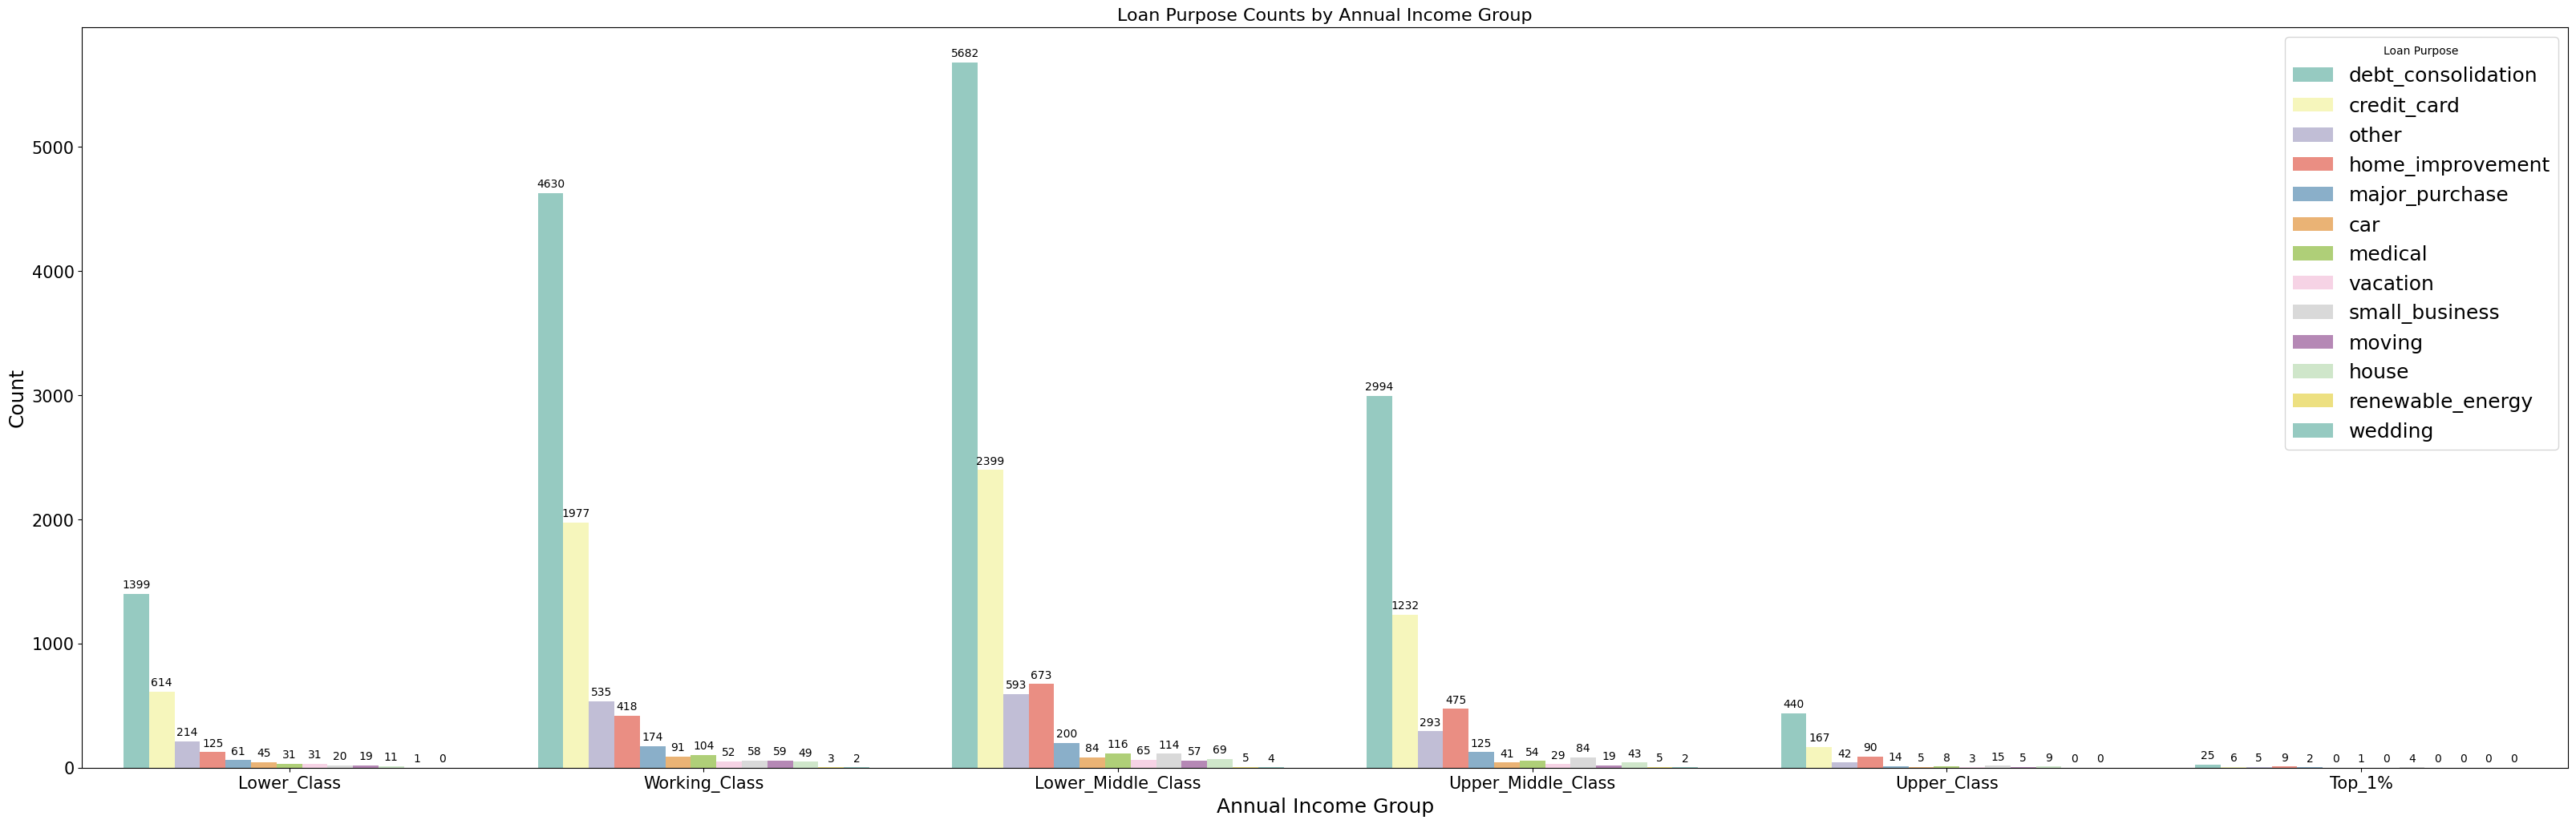

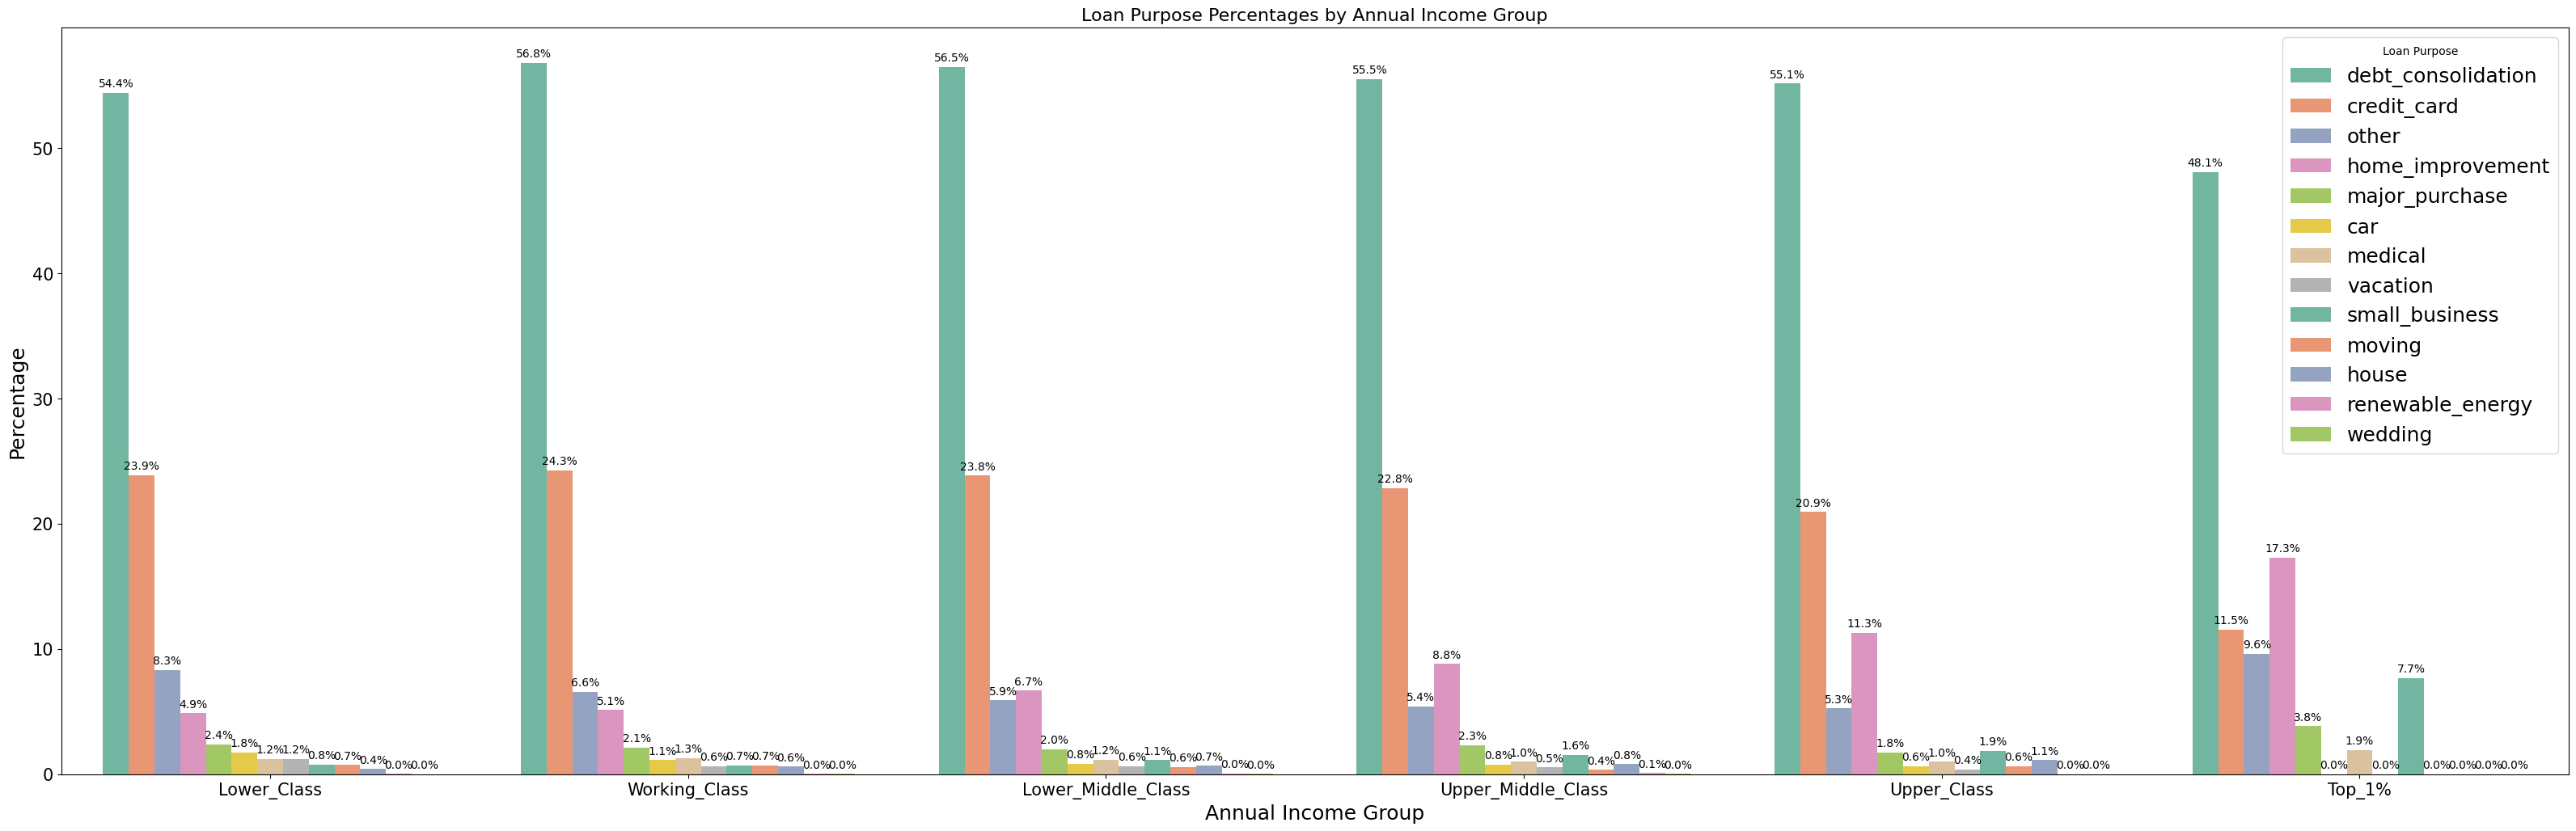


Yearly loan purpose analysis saved to 'yearly_loan_purpose_analysis.csv'.


/var/folders/xt/0l9mqwh56cvdq97mqqhsq9c80000gn/T/ipykernel_17819/2125307504.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


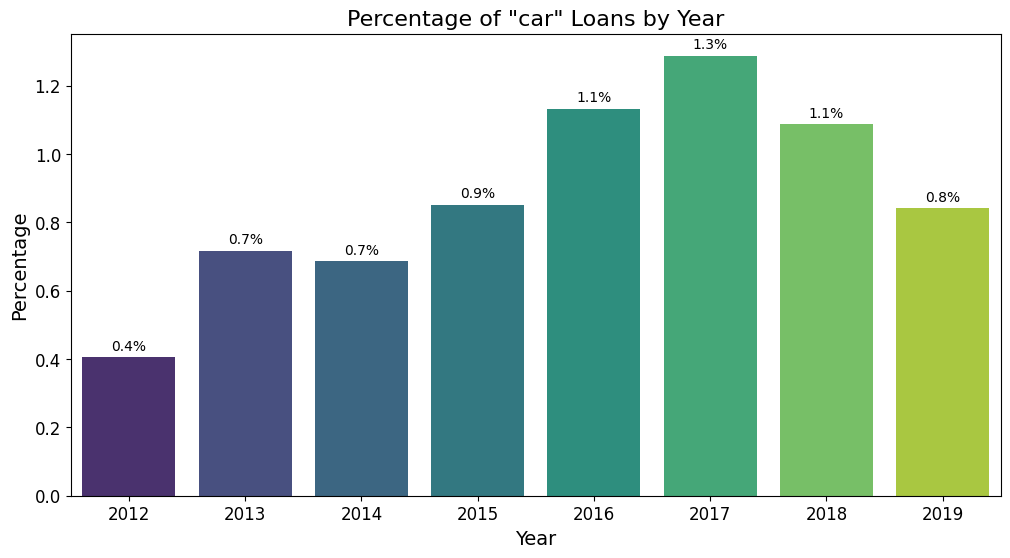

/var/folders/xt/0l9mqwh56cvdq97mqqhsq9c80000gn/T/ipykernel_17819/2125307504.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


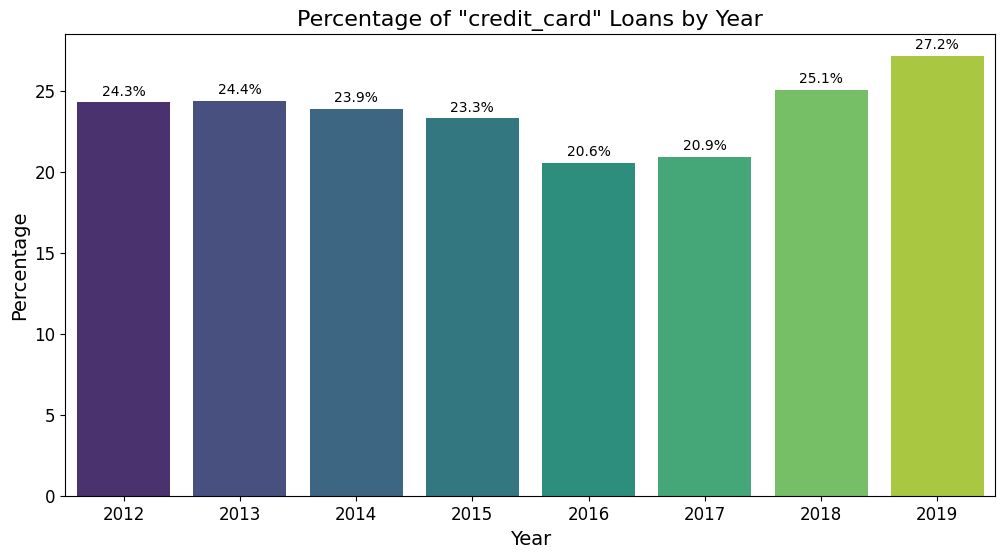

/var/folders/xt/0l9mqwh56cvdq97mqqhsq9c80000gn/T/ipykernel_17819/2125307504.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


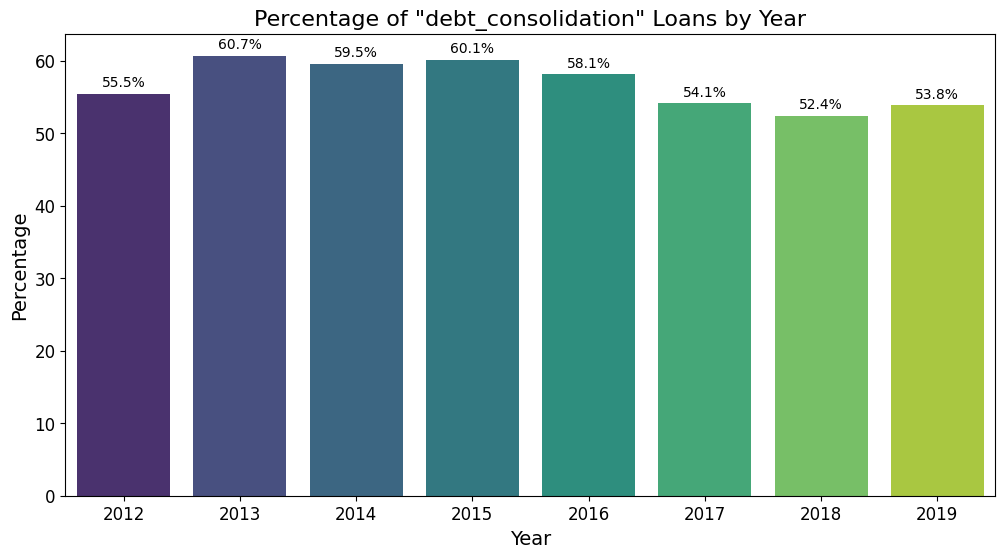

/var/folders/xt/0l9mqwh56cvdq97mqqhsq9c80000gn/T/ipykernel_17819/2125307504.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


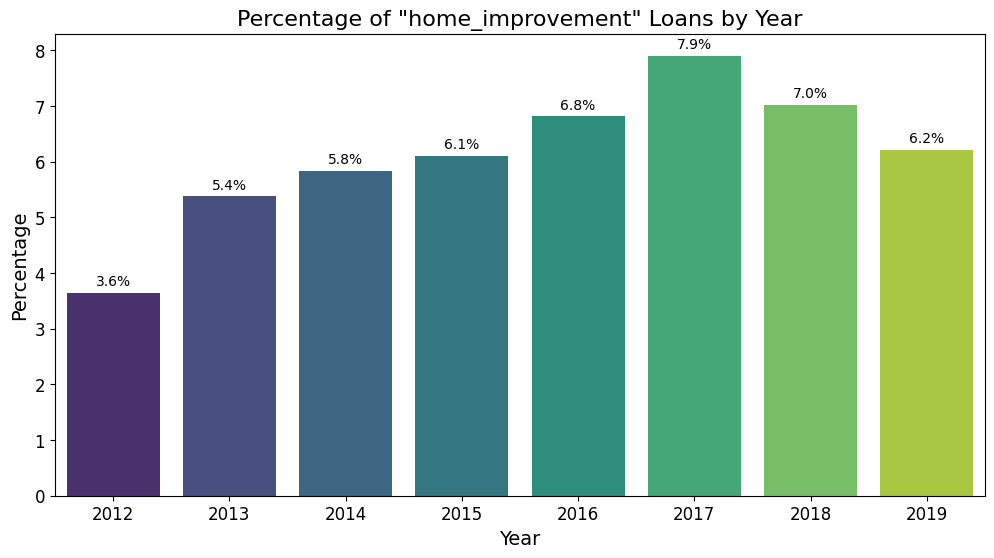

/var/folders/xt/0l9mqwh56cvdq97mqqhsq9c80000gn/T/ipykernel_17819/2125307504.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


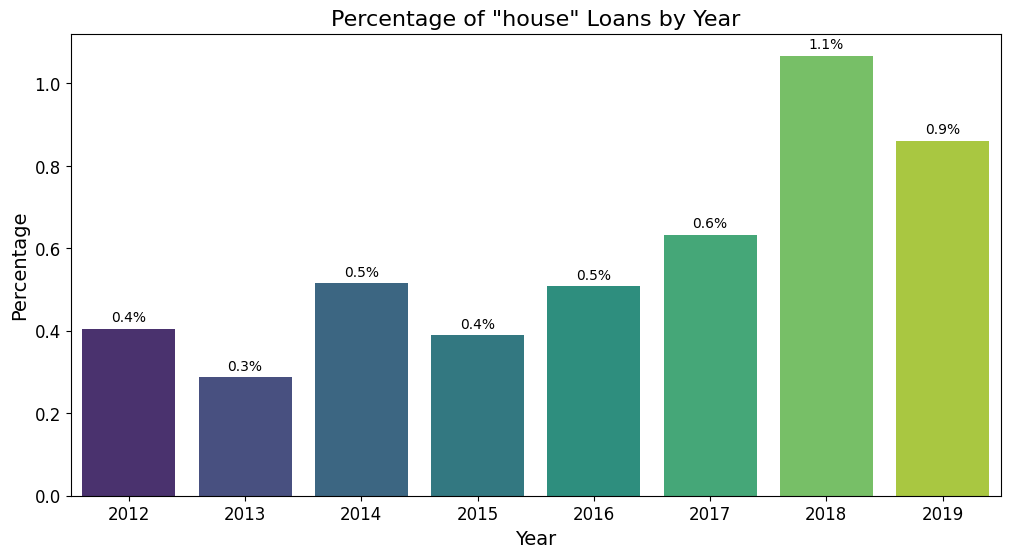

/var/folders/xt/0l9mqwh56cvdq97mqqhsq9c80000gn/T/ipykernel_17819/2125307504.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


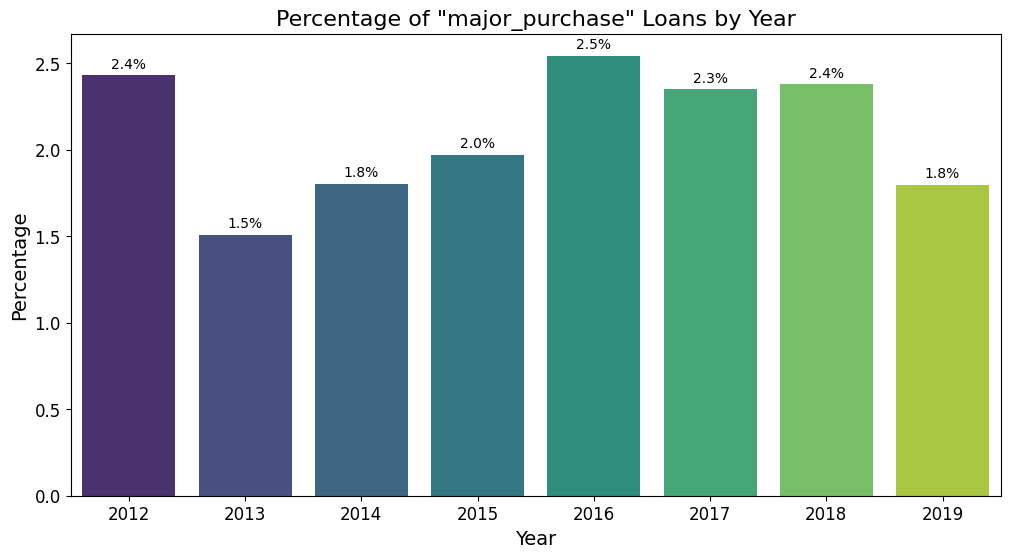

/var/folders/xt/0l9mqwh56cvdq97mqqhsq9c80000gn/T/ipykernel_17819/2125307504.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


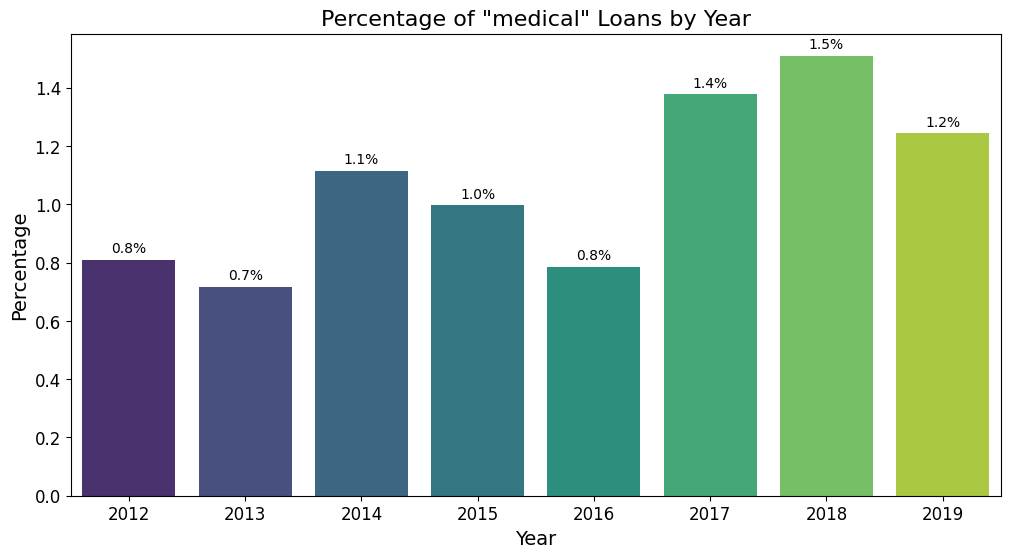

/var/folders/xt/0l9mqwh56cvdq97mqqhsq9c80000gn/T/ipykernel_17819/2125307504.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


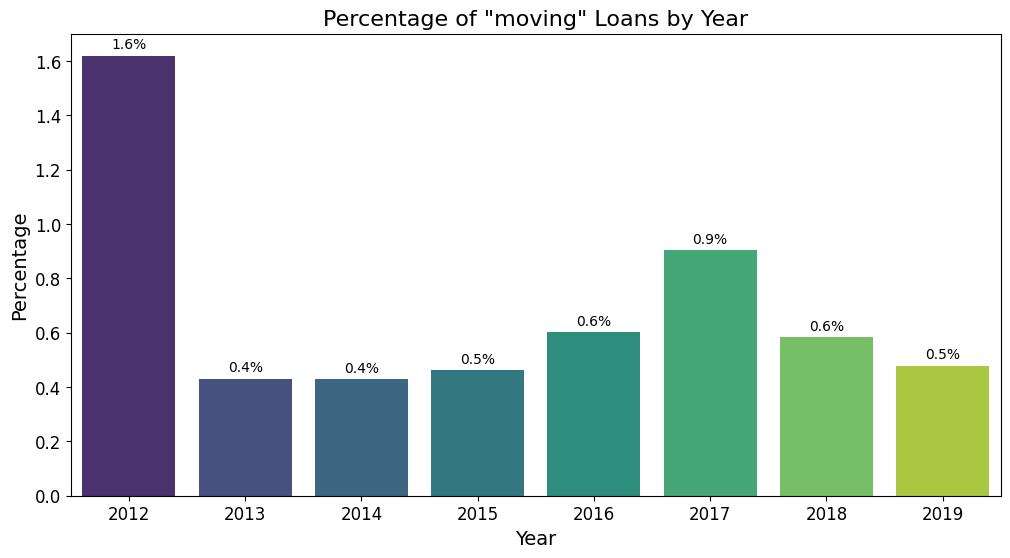

/var/folders/xt/0l9mqwh56cvdq97mqqhsq9c80000gn/T/ipykernel_17819/2125307504.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


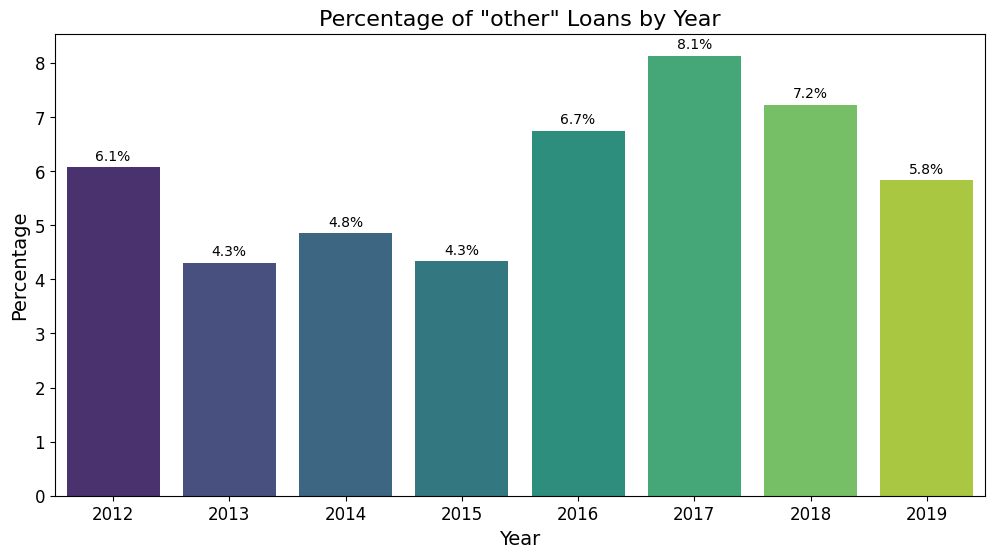

/var/folders/xt/0l9mqwh56cvdq97mqqhsq9c80000gn/T/ipykernel_17819/2125307504.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


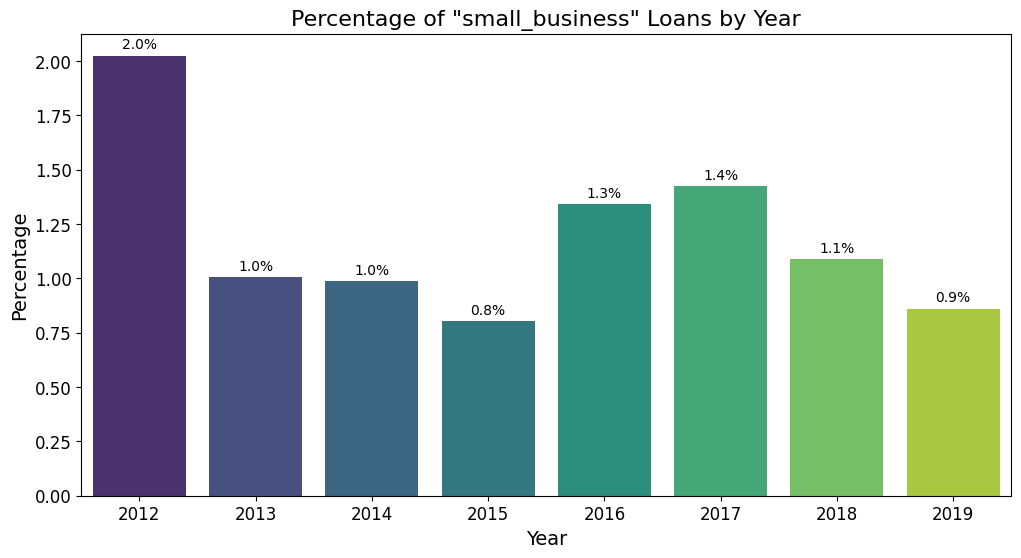

/var/folders/xt/0l9mqwh56cvdq97mqqhsq9c80000gn/T/ipykernel_17819/2125307504.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


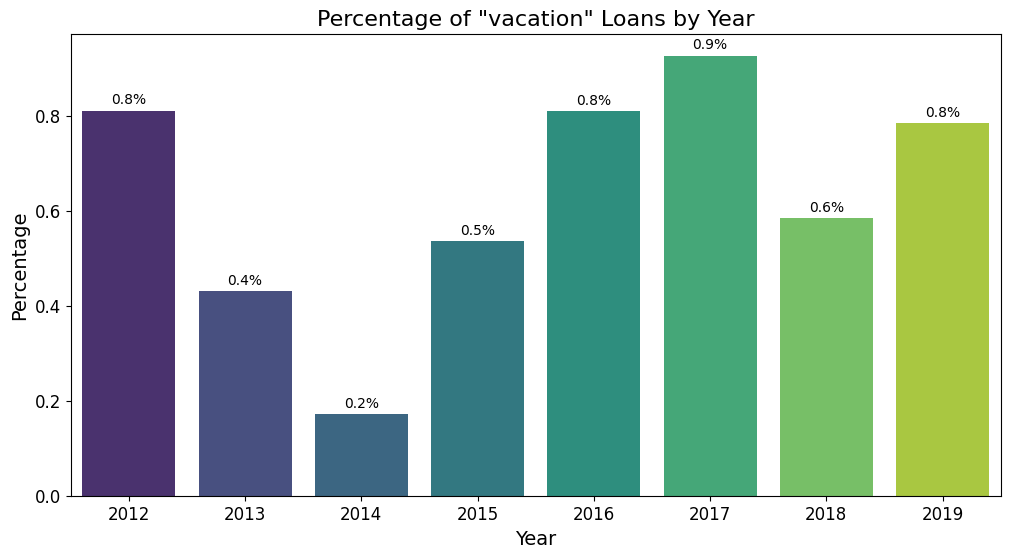

/var/folders/xt/0l9mqwh56cvdq97mqqhsq9c80000gn/T/ipykernel_17819/2125307504.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


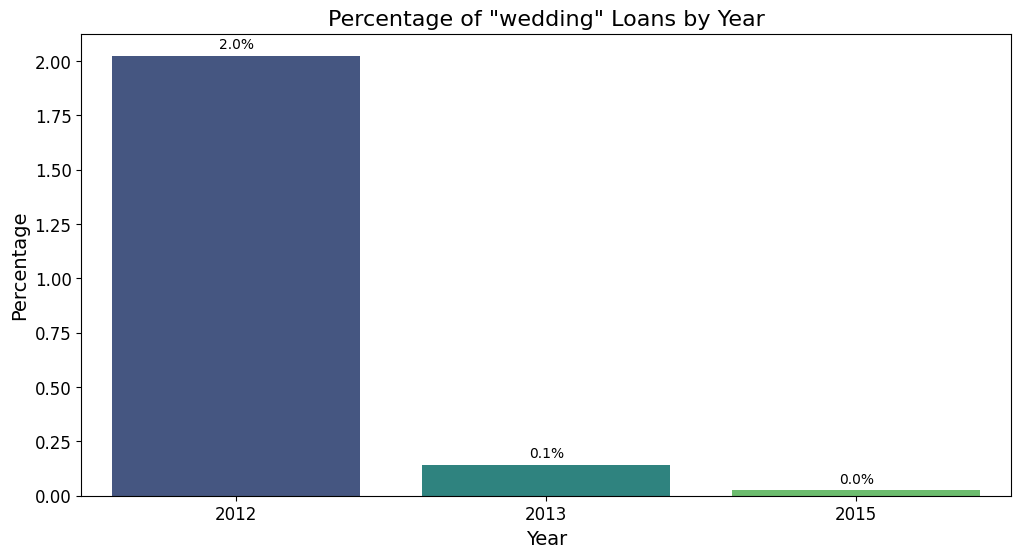

/var/folders/xt/0l9mqwh56cvdq97mqqhsq9c80000gn/T/ipykernel_17819/2125307504.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


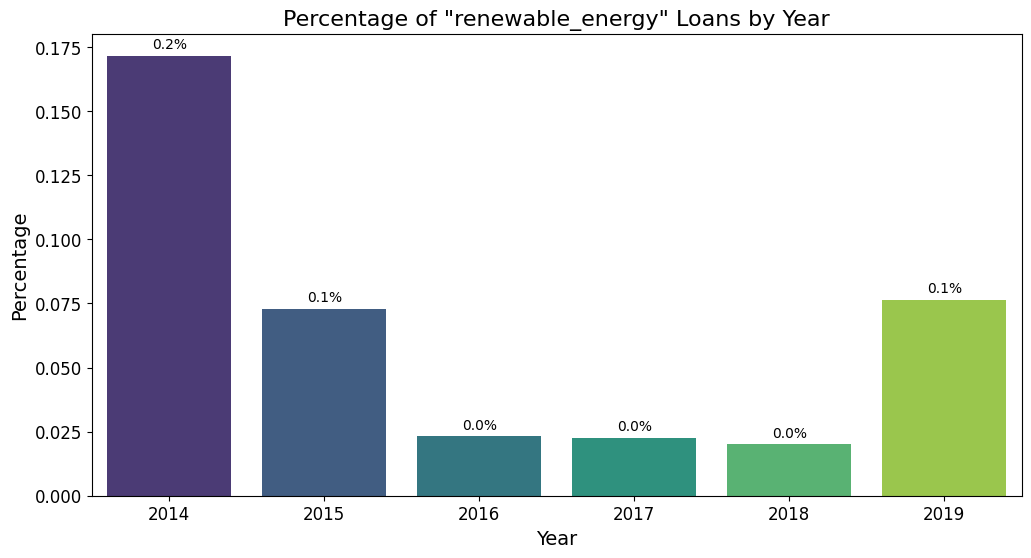

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def loan_purpose_analysis(df, income_group_col, loan_purpose_col, year_col=None):
    """
    Analyze loan purpose counts and percentages by income groups and years.
    Identify the class with the highest total loans and plot each loan purpose separately.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        income_group_col (str): The column name representing income groups.
        loan_purpose_col (str): The column name representing loan purposes.
        year_col (str, optional): The column name representing years. If provided, analysis will include yearly breakdowns.

    Returns:
        None
    """
    # Ensure the required columns are in the DataFrame
    required_columns = [income_group_col, loan_purpose_col]
    if year_col:
        required_columns.append(year_col)
    
    missing_columns = [col for col in required_columns if col not in df.columns]
    if missing_columns:
        print(f"The following columns are missing in the dataset: {missing_columns}")
        return

    # Group by income groups and loan purposes, count occurrences
    loan_purpose_counts = (
        df.groupby(income_group_col)[loan_purpose_col]
        .value_counts(normalize=False)  # Get counts
        .rename('count')
        .reset_index()
    )

    # Add percentage calculations
    loan_purpose_counts['percentage'] = (
        loan_purpose_counts.groupby(income_group_col)['count']
        .transform(lambda x: x / x.sum() * 100)
    )

    # Total loans by income group
    total_loans_by_group = loan_purpose_counts.groupby(income_group_col)['count'].sum()
    
    # Identify the income group with the highest total loans
    max_loans_group = total_loans_by_group.idxmax()
    max_loans_count = total_loans_by_group.max()
    print(f"\nThe income group with the highest total loans is '{max_loans_group}' with {max_loans_count} loans.")

    # Print the counts and percentages for each group
    print("\nCounts and percentages of each loan purpose in each annual income group:")
    for income_group, group_data in loan_purpose_counts.groupby(income_group_col):
        print(f"\nIncome Group: {income_group}")
        for index, row in group_data.iterrows():
            print(f"  {row[loan_purpose_col]}: {row['count']} ({row['percentage']:.2f}%)")

    # Save the loan purpose analysis to a CSV file
    loan_purpose_counts.to_csv('loan_purpose_income_group_analysis.csv', index=False)
    print("\nLoan purpose analysis saved to 'loan_purpose_income_group_analysis.csv'.")

    # Visualize counts as a bar chart
    plt.figure(figsize=(40, 12))
    sns.barplot(
        data=loan_purpose_counts, 
        x=income_group_col, 
        y='count', 
        hue=loan_purpose_col, 
        palette='Set3'
    )
    plt.title('Loan Purpose Counts by Annual Income Group', fontsize=16)
    plt.xlabel('Annual Income Group', fontsize=18)
    plt.ylabel('Count', fontsize=18)
    plt.legend(title='Loan Purpose', fontsize=18)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    # Add count labels above bars
    for container in plt.gca().containers:
        plt.gca().bar_label(container, fmt='%d', fontsize=10, padding=3)
    
    plt.show()

    # Visualize percentages as a bar chart
    plt.figure(figsize=(40, 12))
    sns.barplot(
        data=loan_purpose_counts, 
        x=income_group_col, 
        y='percentage', 
        hue=loan_purpose_col, 
        palette='Set2'
    )
    plt.title('Loan Purpose Percentages by Annual Income Group', fontsize=16)
    plt.xlabel('Annual Income Group', fontsize=18)
    plt.ylabel('Percentage', fontsize=18)
    plt.legend(title='Loan Purpose', fontsize=18)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    # Add percentage labels above bars
    for container in plt.gca().containers:
        plt.gca().bar_label(container, fmt='%.1f%%', fontsize=10, padding=3)
    
    plt.show()

    # If year_col is provided, perform yearly analysis
    if year_col:
        # Group by year and loan purpose, count occurrences
        yearly_loan_purpose_counts = (
            df.groupby([year_col, loan_purpose_col])[loan_purpose_col]
            .value_counts(normalize=False)  # Get counts
            .rename('count')
            .reset_index()
        )

        # Add percentage calculations for yearly data
        yearly_loan_purpose_counts['percentage'] = (
            yearly_loan_purpose_counts.groupby(year_col)['count']
            .transform(lambda x: x / x.sum() * 100)
        )

        # Save the yearly loan purpose analysis to a CSV file
        yearly_loan_purpose_counts.to_csv('yearly_loan_purpose_analysis.csv', index=False)
        print("\nYearly loan purpose analysis saved to 'yearly_loan_purpose_analysis.csv'.")

        # Plot each loan purpose separately
        unique_purposes = yearly_loan_purpose_counts[loan_purpose_col].unique()
        for purpose in unique_purposes:
            # Filter data for the current loan purpose
            purpose_data = yearly_loan_purpose_counts[yearly_loan_purpose_counts[loan_purpose_col] == purpose]
            
            # Plot the percentage for the current loan purpose over the years
            plt.figure(figsize=(12, 6))
            sns.barplot(
                data=purpose_data, 
                x=year_col, 
                y='percentage', 
                palette='viridis'
            )
            plt.title(f'Percentage of "{purpose}" Loans by Year', fontsize=16)
            plt.xlabel('Year', fontsize=14)
            plt.ylabel('Percentage', fontsize=14)
            plt.xticks(fontsize=12)
            plt.yticks(fontsize=12)
            
            # Add percentage labels above bars
            for container in plt.gca().containers:
                plt.gca().bar_label(container, fmt='%.1f%%', fontsize=10, padding=3)
            
            plt.show()

# Example usage
# Assuming df_fintech has columns 'annual_income_grouped', 'purpose', and 'issue_year'
loan_purpose_analysis(df_fintech, 'annual_income_grouped', 'purpose', 'issue_year')

As shown as mentioned before that as class go higher the Mortgage increase which may lead for a higher percentage of purpose for home improvement at higher class so as shown home improvement was 4.9(%) of the total loan at lower_class goes to 17.3(%) at Top 1% class


Home Improvement loans can be considered as part of a mortgage, especially if the borrower is using the funds to enhance or renovate the property that is securing the loan.
home improvement can definitely be considered for a mortgage. By using home equity or a specialized loan like a cash-out refinance, FHA 203(k), or HomeStyle Renovation loan, borrowers can obtain funds to improve their property while securing the loan with their home.

In [12]:
df_fintech.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 27030 entries, ('YichXHg4OVx4MDMuXHgwYi9RXHhkY1x4MGZ3QFx4OTJceGUxXHg5NmJceGJkXHhjZVx4OWZceGE4XHhjMSJ4XHg5OFx4ZmFceGI0XHhiZHppJDdceDEyNyc=', np.int64(35662)) to ('YidceDFmXHgxZm5hZlx4OTNceDk3XHgwN1x4MTFceDA4SFx4YjFceDAxXHhkOCpceGE0XHhmY31ceGYzXHgxM2dceGU5XHg5OEM8Y1x4N2Y7XHhiMFx4ODRcblx4OWMn', np.int64(265260))
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   emp_title              24635 non-null  object        
 1   emp_length             25143 non-null  float64       
 2   home_ownership         27030 non-null  object        
 3   annual_inc             27030 non-null  float64       
 4   annual_inc_joint       1822 non-null   float64       
 5   verification_status    27030 non-null  object        
 6   zip_code               27030 non-null  object        
 7   addr_state             27030 non-null  object        
 8   avg_cur_bal

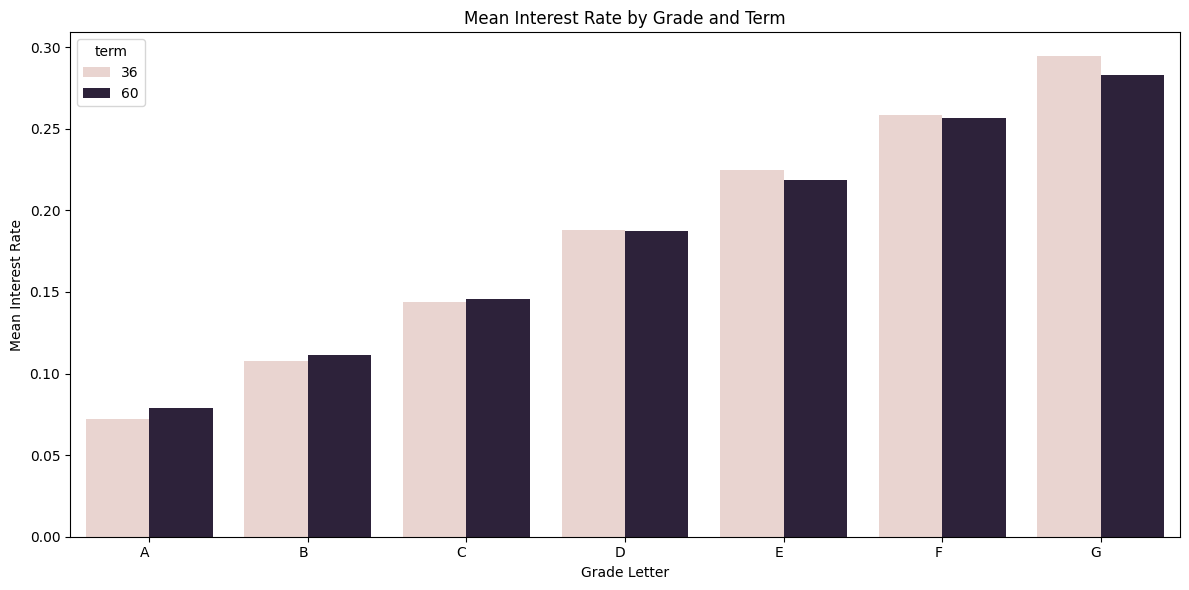

,grade_grouped,term,int_rate
0,A,36,0.071837
1,A,60,0.079111
2,B,36,0.107566
3,B,60,0.111495
4,C,36,0.143526
5,C,60,0.145467
6,D,36,0.188088
7,D,60,0.187624
8,E,36,0.224931
9,E,60,0.218604


In [13]:
grouped_data = df_fintech.groupby(['grade_grouped', 'term'])['int_rate'].mean()

# Reset index to make 'grade_letter' and 'term' as columns
grouped_data = grouped_data.reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='grade_grouped', y='int_rate', hue='term', data=grouped_data)
plt.title('Mean Interest Rate by Grade and Term')
plt.xlabel('Grade Letter')
plt.ylabel('Mean Interest Rate')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()
grouped_data

In [14]:
# As shown there is no difference between 36 and 60 months term mean of int_rate at each grade as they are nearly the same mean value 

In [15]:
df_fintech.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 27030 entries, ('YichXHg4OVx4MDMuXHgwYi9RXHhkY1x4MGZ3QFx4OTJceGUxXHg5NmJceGJkXHhjZVx4OWZceGE4XHhjMSJ4XHg5OFx4ZmFceGI0XHhiZHppJDdceDEyNyc=', np.int64(35662)) to ('YidceDFmXHgxZm5hZlx4OTNceDk3XHgwN1x4MTFceDA4SFx4YjFceDAxXHhkOCpceGE0XHhmY31ceGYzXHgxM2dceGU5XHg5OEM8Y1x4N2Y7XHhiMFx4ODRcblx4OWMn', np.int64(265260))
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   emp_title              24635 non-null  object        
 1   emp_length             25143 non-null  float64       
 2   home_ownership         27030 non-null  object        
 3   annual_inc             27030 non-null  float64       
 4   annual_inc_joint       1822 non-null   float64       
 5   verification_status    27030 non-null  object        
 6   zip_code               27030 non-null  object        
 7   addr_state             27030 non-null  object        
 8   avg_cur_bal

# **Encoding Funtion (Feature Engineering) Advantages Key**


1. Custom Mapping for Better Control:
The function uses a custom order for the classes (desired_classes) for the home_ownership column and a manual mapping for the verification_status column, ensuring that the encoding reflects a meaningful hierarchy or predefined order.
For instance, the desired classes (MORTGAGE, RENT, etc.) are encoded in the desired order instead of relying on default alphabetical sorting.
2. Handles Missing or Unexpected Values Gracefully:
The function applies a check to ensure that only valid entries from desired_classes are encoded, while unexpected or invalid values are assigned NaN.
This ensures robustness in handling potential data inconsistencies.
3. Preserves Original Values:
It creates lookup tables (Encoded_home_ownership_lookupTable.csv and Verification_Status_Encoded_lookupTable.csv) that map original values to their encoded counterparts. This makes it easier to trace or interpret encoded values during analysis.
4. Separates Numerical and Categorical Data:
By converting categorical columns (home_ownership and verification_status) into numeric encodings, the function prepares the data for machine learning models, many of which cannot handle non-numeric inputs.



In [16]:

from sklearn.preprocessing import LabelEncoder , OneHotEncoder
def label_encoding_function(df,col,col1): 
 
 lookup_df = df[[col]].copy()
 lookup_df.rename(columns={col: 'original_home_ownership'}, inplace=True)
 lookup_df1 =df[[col1]].copy()
 lookup_df1.rename(columns={col1: 'original_Verification_status'}, inplace=True)
# Custom class order
 desired_classes = ['MORTGAGE', 'RENT', 'OWN', 'ANY', 'OTHER']
 verification_mapping = {
    'Not Verified': 0,
    'Verified': 1,
    'Source Verified': 2
}
# Initialize LabelEncoder
 label_encoder = LabelEncoder()
 label_encoder.classes_ = np.array(desired_classes)
 df['Verification_Status_Encoded'] = df[col1].map(verification_mapping)

# Encode column
 df['Encoded_home_ownership'] = df[col].apply(
    lambda x: label_encoder.transform([x])[0] if x in desired_classes else np.nan
)
 
 lookup_df['Encoded_home_ownership'] = df['Encoded_home_ownership']
 lookup_df.to_csv('Encoded_home_ownership_lookupTable.csv', index=False)
 lookup_df1['Verification_Status_Encoded'] = df['Verification_Status_Encoded']
 lookup_df1.to_csv('Verification_Status_Encoded_lookupTable.csv', index=False)

 
label_encoding_function(df_fintech,'home_ownership','verification_status')

In [17]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

def one_hot_encode(df_1, column, prefix=None):
 
    # Initialize OneHotEncoder
    encoder = OneHotEncoder(sparse_output=False, dtype=int)
    
    # Fit and transform the specified column
    encoded_array = encoder.fit_transform(df_1[[column]])
    
    # Create column names
    if prefix is None:
        prefix = column
    encoded_columns = [f"{prefix}_{category}" for category in encoder.categories_[0]]
    
    # Convert the encoded array to a DataFrame
    encoded_df = pd.DataFrame(encoded_array, columns=encoded_columns, index=df_1.index)
    
    # Concatenate the encoded DataFrame with the original DataFrame (drop original column)
    df_1 = pd.concat([df_1, encoded_df], axis=1)
    
    return df_1





In [18]:
df_fintech =one_hot_encode(df_fintech, 'loan_status')

In [19]:
df_fintech.to_csv("test2.csv",index=False)

In [20]:
df_fintech.head(5)

,,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description,issue_year,issue_month,grade_grouped,annual_income_grouped,Verification_Status_Encoded,Encoded_home_ownership,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days)
customer_id,loan_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
YichXHg4OVx4MDMuXHgwYi9RXHhkY1x4MGZ3QFx4OTJceGUxXHg5NmJceGJkXHhjZVx4OWZceGE4XHhjMSJ4XHg5OFx4ZmFceGI0XHhiZHppJDdceDEyNyc=,35662,VanVarick and Sons,5.0,RENT,50000.0,NaN,Not Verified,074xx,NJ,2174,13043,Fully Paid,5325,NJ,5325,36,0.1629,12,2012-08-12,False,Individual,debt_consolidation,credit card consolidation,2012,8,C,Working_Class,0,1,0,0,0,1,0,0,0
Yic7XHhhNFx4OTZTXHhkM1x4Y2RceGE2XHhhNCtcblx4OWFceGY3Ylx4ZDBceGRjXHhlNFx4ZWRceDhmR1x4OWZGXHgxNFx4MDVceDAyM1x4MDBPXHhkMm5ceGFhd1x4YTYn,153163,Woodruff-Sawyer & Co.,6.0,RENT,94000.0,NaN,Source Verified,926xx,CA,2493,17448,Fully Paid,15000,CA,15000,36,0.1580,13,2012-08-12,False,Individual,wedding,Wedding,2012,8,C,Lower_Middle_Class,2,1,0,0,0,1,0,0,0
YidceDgze19ceDBlXHhiOVx4YzNceDAzXHhmOVtMXkRSOVx4ZjNceGY3K1x4ZTlceGQ1XHhkYlx4YmVceGZmXHgwODJceGE4XHhkOVx4YTJceDk3XHhkNlx4Y2FceDBmXHhiYSc=,162087,comcast,10.0,MORTGAGE,50000.0,NaN,Not Verified,349xx,FL,17956,161608,Fully Paid,16000,FL,16000,36,0.1409,9,2012-08-12,False,Individual,credit_card,debt help,2012,8,B,Working_Class,0,0,0,0,0,1,0,0,0
YiJvXHhjMUNceDg5XHhmZFx4ZTVceGY2QU9ceDAzXHhjYlx4MGUvXHhkZFx4YThYXHhhY1x4MWJceDhhJ1x4ZjNceGYxdVx4ODBceGMxXHhjNVx4YjNceDFhXHhmNiAlXHg4MSI=,18218,COUNTY OF SAN DIEGO,8.0,RENT,48000.0,NaN,Not Verified,920xx,CA,2976,17855,Charged Off,4000,CA,4000,36,0.1114,9,2012-08-12,False,Individual,debt_consolidation,LENDING,2012,8,B,Working_Class,0,1,1,0,0,0,0,0,0
YidceGQxXHhmZlx4YjBLXHgxZlx4Zjc3dlx4ODEhXHhhZVx4OTF9XHgwZVx4ZDhceDEwcFx4YTUjRVx4MDFGXHg5YUJLU1x4ZDVZPFx4MWRoXHhlNyc=,203070,Keller ISD,10.0,MORTGAGE,51827.0,NaN,Verified,761xx,TX,16660,149936,Fully Paid,20425,TX,20425,60,0.1727,14,2012-08-12,False,Individual,debt_consolidation,Goodbye Credit Cards,2012,8,C,Working_Class,1,0,0,0,0,1,0,0,0


In [21]:
df_fintech['Encoded_home_ownership'].value_counts()

Encoded_home_ownership
0    13289
1    10573
2     3131
3       36
4        1
Name: count, dtype: int64

In [22]:
df_fintech.head()

,,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description,issue_year,issue_month,grade_grouped,annual_income_grouped,Verification_Status_Encoded,Encoded_home_ownership,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days)
customer_id,loan_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
YichXHg4OVx4MDMuXHgwYi9RXHhkY1x4MGZ3QFx4OTJceGUxXHg5NmJceGJkXHhjZVx4OWZceGE4XHhjMSJ4XHg5OFx4ZmFceGI0XHhiZHppJDdceDEyNyc=,35662,VanVarick and Sons,5.0,RENT,50000.0,NaN,Not Verified,074xx,NJ,2174,13043,Fully Paid,5325,NJ,5325,36,0.1629,12,2012-08-12,False,Individual,debt_consolidation,credit card consolidation,2012,8,C,Working_Class,0,1,0,0,0,1,0,0,0
Yic7XHhhNFx4OTZTXHhkM1x4Y2RceGE2XHhhNCtcblx4OWFceGY3Ylx4ZDBceGRjXHhlNFx4ZWRceDhmR1x4OWZGXHgxNFx4MDVceDAyM1x4MDBPXHhkMm5ceGFhd1x4YTYn,153163,Woodruff-Sawyer & Co.,6.0,RENT,94000.0,NaN,Source Verified,926xx,CA,2493,17448,Fully Paid,15000,CA,15000,36,0.1580,13,2012-08-12,False,Individual,wedding,Wedding,2012,8,C,Lower_Middle_Class,2,1,0,0,0,1,0,0,0
YidceDgze19ceDBlXHhiOVx4YzNceDAzXHhmOVtMXkRSOVx4ZjNceGY3K1x4ZTlceGQ1XHhkYlx4YmVceGZmXHgwODJceGE4XHhkOVx4YTJceDk3XHhkNlx4Y2FceDBmXHhiYSc=,162087,comcast,10.0,MORTGAGE,50000.0,NaN,Not Verified,349xx,FL,17956,161608,Fully Paid,16000,FL,16000,36,0.1409,9,2012-08-12,False,Individual,credit_card,debt help,2012,8,B,Working_Class,0,0,0,0,0,1,0,0,0
YiJvXHhjMUNceDg5XHhmZFx4ZTVceGY2QU9ceDAzXHhjYlx4MGUvXHhkZFx4YThYXHhhY1x4MWJceDhhJ1x4ZjNceGYxdVx4ODBceGMxXHhjNVx4YjNceDFhXHhmNiAlXHg4MSI=,18218,COUNTY OF SAN DIEGO,8.0,RENT,48000.0,NaN,Not Verified,920xx,CA,2976,17855,Charged Off,4000,CA,4000,36,0.1114,9,2012-08-12,False,Individual,debt_consolidation,LENDING,2012,8,B,Working_Class,0,1,1,0,0,0,0,0,0
YidceGQxXHhmZlx4YjBLXHgxZlx4Zjc3dlx4ODEhXHhhZVx4OTF9XHgwZVx4ZDhceDEwcFx4YTUjRVx4MDFGXHg5YUJLU1x4ZDVZPFx4MWRoXHhlNyc=,203070,Keller ISD,10.0,MORTGAGE,51827.0,NaN,Verified,761xx,TX,16660,149936,Fully Paid,20425,TX,20425,60,0.1727,14,2012-08-12,False,Individual,debt_consolidation,Goodbye Credit Cards,2012,8,C,Working_Class,1,0,0,0,0,1,0,0,0


In [23]:
df_fintech.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 27030 entries, ('YichXHg4OVx4MDMuXHgwYi9RXHhkY1x4MGZ3QFx4OTJceGUxXHg5NmJceGJkXHhjZVx4OWZceGE4XHhjMSJ4XHg5OFx4ZmFceGI0XHhiZHppJDdceDEyNyc=', np.int64(35662)) to ('YidceDFmXHgxZm5hZlx4OTNceDk3XHgwN1x4MTFceDA4SFx4YjFceDAxXHhkOCpceGE0XHhmY31ceGYzXHgxM2dceGU5XHg5OEM8Y1x4N2Y7XHhiMFx4ODRcblx4OWMn', np.int64(265260))
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   emp_title                       24635 non-null  object        
 1   emp_length                      25143 non-null  float64       
 2   home_ownership                  27030 non-null  object        
 3   annual_inc                      27030 non-null  float64       
 4   annual_inc_joint                1822 non-null   float64       
 5   verification_status             27030 non-null  object        
 6   zip_code                        27030 non-null  object   

In [24]:
df_fintech.head()

,,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description,issue_year,issue_month,grade_grouped,annual_income_grouped,Verification_Status_Encoded,Encoded_home_ownership,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days)
customer_id,loan_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
YichXHg4OVx4MDMuXHgwYi9RXHhkY1x4MGZ3QFx4OTJceGUxXHg5NmJceGJkXHhjZVx4OWZceGE4XHhjMSJ4XHg5OFx4ZmFceGI0XHhiZHppJDdceDEyNyc=,35662,VanVarick and Sons,5.0,RENT,50000.0,NaN,Not Verified,074xx,NJ,2174,13043,Fully Paid,5325,NJ,5325,36,0.1629,12,2012-08-12,False,Individual,debt_consolidation,credit card consolidation,2012,8,C,Working_Class,0,1,0,0,0,1,0,0,0
Yic7XHhhNFx4OTZTXHhkM1x4Y2RceGE2XHhhNCtcblx4OWFceGY3Ylx4ZDBceGRjXHhlNFx4ZWRceDhmR1x4OWZGXHgxNFx4MDVceDAyM1x4MDBPXHhkMm5ceGFhd1x4YTYn,153163,Woodruff-Sawyer & Co.,6.0,RENT,94000.0,NaN,Source Verified,926xx,CA,2493,17448,Fully Paid,15000,CA,15000,36,0.1580,13,2012-08-12,False,Individual,wedding,Wedding,2012,8,C,Lower_Middle_Class,2,1,0,0,0,1,0,0,0
YidceDgze19ceDBlXHhiOVx4YzNceDAzXHhmOVtMXkRSOVx4ZjNceGY3K1x4ZTlceGQ1XHhkYlx4YmVceGZmXHgwODJceGE4XHhkOVx4YTJceDk3XHhkNlx4Y2FceDBmXHhiYSc=,162087,comcast,10.0,MORTGAGE,50000.0,NaN,Not Verified,349xx,FL,17956,161608,Fully Paid,16000,FL,16000,36,0.1409,9,2012-08-12,False,Individual,credit_card,debt help,2012,8,B,Working_Class,0,0,0,0,0,1,0,0,0
YiJvXHhjMUNceDg5XHhmZFx4ZTVceGY2QU9ceDAzXHhjYlx4MGUvXHhkZFx4YThYXHhhY1x4MWJceDhhJ1x4ZjNceGYxdVx4ODBceGMxXHhjNVx4YjNceDFhXHhmNiAlXHg4MSI=,18218,COUNTY OF SAN DIEGO,8.0,RENT,48000.0,NaN,Not Verified,920xx,CA,2976,17855,Charged Off,4000,CA,4000,36,0.1114,9,2012-08-12,False,Individual,debt_consolidation,LENDING,2012,8,B,Working_Class,0,1,1,0,0,0,0,0,0
YidceGQxXHhmZlx4YjBLXHgxZlx4Zjc3dlx4ODEhXHhhZVx4OTF9XHgwZVx4ZDhceDEwcFx4YTUjRVx4MDFGXHg5YUJLU1x4ZDVZPFx4MWRoXHhlNyc=,203070,Keller ISD,10.0,MORTGAGE,51827.0,NaN,Verified,761xx,TX,16660,149936,Fully Paid,20425,TX,20425,60,0.1727,14,2012-08-12,False,Individual,debt_consolidation,Goodbye Credit Cards,2012,8,C,Working_Class,1,0,0,0,0,1,0,0,0


In [25]:
grouped_data = df_fintech.groupby('annual_income_grouped')['emp_title'].apply(lambda x: x.isna().sum())
grouped_data

/var/folders/xt/0l9mqwh56cvdq97mqqhsq9c80000gn/T/ipykernel_17819/2665718557.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_fintech.groupby('annual_income_grouped')['emp_title'].apply(lambda x: x.isna().sum())


annual_income_grouped
Lower_Class           686
Working_Class         788
Lower_Middle_Class    603
Upper_Middle_Class    275
Upper_Class            38
Top_1%                  5
Name: emp_title, dtype: int64

In [26]:
df_fintech.head(20)

,,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description,issue_year,issue_month,grade_grouped,annual_income_grouped,Verification_Status_Encoded,Encoded_home_ownership,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days)
customer_id,loan_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
YichXHg4OVx4MDMuXHgwYi9RXHhkY1x4MGZ3QFx4OTJceGUxXHg5NmJceGJkXHhjZVx4OWZceGE4XHhjMSJ4XHg5OFx4ZmFceGI0XHhiZHppJDdceDEyNyc=,35662,VanVarick and Sons,5.0,RENT,50000.0,NaN,Not Verified,074xx,NJ,2174,13043,Fully Paid,5325,NJ,5325,36,0.1629,12,2012-08-12,False,Individual,debt_consolidation,credit card consolidation,2012,8,C,Working_Class,0,1,0,0,0,1,0,0,0
Yic7XHhhNFx4OTZTXHhkM1x4Y2RceGE2XHhhNCtcblx4OWFceGY3Ylx4ZDBceGRjXHhlNFx4ZWRceDhmR1x4OWZGXHgxNFx4MDVceDAyM1x4MDBPXHhkMm5ceGFhd1x4YTYn,153163,Woodruff-Sawyer & Co.,6.0,RENT,94000.0,NaN,Source Verified,926xx,CA,2493,17448,Fully Paid,15000,CA,15000,36,0.1580,13,2012-08-12,False,Individual,wedding,Wedding,2012,8,C,Lower_Middle_Class,2,1,0,0,0,1,0,0,0
YidceDgze19ceDBlXHhiOVx4YzNceDAzXHhmOVtMXkRSOVx4ZjNceGY3K1x4ZTlceGQ1XHhkYlx4YmVceGZmXHgwODJceGE4XHhkOVx4YTJceDk3XHhkNlx4Y2FceDBmXHhiYSc=,162087,comcast,10.0,MORTGAGE,50000.0,NaN,Not Verified,349xx,FL,17956,161608,Fully Paid,16000,FL,16000,36,0.1409,9,2012-08-12,False,Individual,credit_card,debt help,2012,8,B,Working_Class,0,0,0,0,0,1,0,0,0
YiJvXHhjMUNceDg5XHhmZFx4ZTVceGY2QU9ceDAzXHhjYlx4MGUvXHhkZFx4YThYXHhhY1x4MWJceDhhJ1x4ZjNceGYxdVx4ODBceGMxXHhjNVx4YjNceDFhXHhmNiAlXHg4MSI=,18218,COUNTY OF SAN DIEGO,8.0,RENT,48000.0,NaN,Not Verified,920xx,CA,2976,17855,Charged Off,4000,CA,4000,36,0.1114,9,2012-08-12,False,Individual,debt_consolidation,LENDING,2012,8,B,Working_Class,0,1,1,0,0,0,0,0,0
YidceGQxXHhmZlx4YjBLXHgxZlx4Zjc3dlx4ODEhXHhhZVx4OTF9XHgwZVx4ZDhceDEwcFx4YTUjRVx4MDFGXHg5YUJLU1x4ZDVZPFx4MWRoXHhlNyc=,203070,Keller ISD,10.0,MORTGAGE,51827.0,NaN,Verified,761xx,TX,16660,149936,Fully Paid,20425,TX,20425,60,0.1727,14,2012-08-12,False,Individual,debt_consolidation,Goodbye Credit Cards,2012,8,C,Working_Class,1,0,0,0,0,1,0,0,0
YidceDFiXVx4YzJlIlx4MDJceGM1XHhjM1x4ZjdnXHg4N1x4YjFceDAxXHhhYVx4MWNceGYwXHhhNlx4ZmMoXHg4NVx4YWU6XHgxNVx4OGNceGE1XHg4NFZceGRiXHhmOWtceGU1XHhjYSc=,213262,"Butler & Allen, P.A.",10.0,RENT,58561.0,NaN,Verified,551xx,MN,6287,31436,Charged Off,23325,MN,23325,60,0.2149,21,2012-08-12,False,Individual,debt_consolidation,Consolidation,2012,8,E,Working_Class,1,1,1,0,0,0,0,0,0
YidceDg3XHhhYVZ3XHhmZXRmXHg3Zlx4MDFyXHhiZFx4YzVceGI2XHgwOFx4OTRNXHgwNkFceGE0dFx4OWRdXHhmYlx4ZWRcclx4ZTBceDA4aW1EIUon,76085,MMCN,1.0,RENT,37000.0,NaN,Not Verified,951xx,CA,1606,19276,Fully Paid,9000,CA,9000,36,NaN,8,2012-08-12,False,Individual,credit_card,Loan,2012,8,B,Working_Class,0,1,0,0,0,1,0,0,0
Yid8Ol9sXHg5OU83dTVceDgxclx4ZjRceGViXHg4ZihceGNlXHhhMlx4Y2Z2XHhmZWlceGMzXHgxMkhceDdmXHgxYyhnXHhkZFx4MTVtXHgxOSc=,1464,NaN,NaN,RENT,30000.0,NaN,Not Verified,316xx,GA,1357,10855,Fully Paid,1200,GA,1200,36,0.1212,10,2012-08-12,False,Individual,moving,Moving,2012,8,B,Lower_Class,0,1,0,0,0,1,0,0,0
YidceGQ2XHhiZlx4OTNpZlx4OGVKWE1SUHVgR1x4ZjRceGU0VFx4ZDFceGMwXHhjMk1ceGM4XHhjYVx4MDBceDhjXHhjMVx4ZGRrS1x4YTNceDExSic=,52987,US Navy,10.0,MORTGAGE,102000.0,NaN,Not Verified,235xx,VA,42096,505153,Fully Paid,7000,VA,7000,36,0.0890,3,2012-09-12,False,Individual,debt_consolidation,Consolidate1,2012,9,A,Upper_Middle_Class,0,0,0,0,0,1,0,0,0


In [27]:
df_fintech.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 27030 entries, ('YichXHg4OVx4MDMuXHgwYi9RXHhkY1x4MGZ3QFx4OTJceGUxXHg5NmJceGJkXHhjZVx4OWZceGE4XHhjMSJ4XHg5OFx4ZmFceGI0XHhiZHppJDdceDEyNyc=', np.int64(35662)) to ('YidceDFmXHgxZm5hZlx4OTNceDk3XHgwN1x4MTFceDA4SFx4YjFceDAxXHhkOCpceGE0XHhmY31ceGYzXHgxM2dceGU5XHg5OEM8Y1x4N2Y7XHhiMFx4ODRcblx4OWMn', np.int64(265260))
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   emp_title                       24635 non-null  object        
 1   emp_length                      25143 non-null  float64       
 2   home_ownership                  27030 non-null  object        
 3   annual_inc                      27030 non-null  float64       
 4   annual_inc_joint                1822 non-null   float64       
 5   verification_status             27030 non-null  object        
 6   zip_code                        27030 non-null  object   

In [28]:
# Analysis for Emp_title & Emp_length together 
def emp_title_length_EDA(df,col1,col2):
 emp_title_null = df[col1].isna()
 emp_length_null = df[col2].isna()

# Define patterns
 sum_rows = len(df)
 both_null = emp_title_null & emp_length_null
 emp_title_only_null = emp_title_null & ~emp_length_null
 emp_length_only_null = emp_length_null & ~emp_title_null


# Count and percentage
 analysis_results = {
    'both_null': {'count': both_null.sum(), 'percentage': (both_null.sum() / sum_rows) * 100},
    'title_only_null': {'count': emp_title_only_null.sum(), 'percentage': (emp_title_only_null.sum() / sum_rows) * 100},
    'length_only_null': {'count': emp_length_only_null.sum(), 'percentage': (emp_length_only_null.sum() / sum_rows) * 100},
}

# Convert results to DataFrame
 analysis_results_df = pd.DataFrame(analysis_results).T  # Transpose for readability
 analysis_results_df['percentage'] = analysis_results_df['percentage'].map("{:.2f}%".format)
 return analysis_results_df
# Display the results
emp_title_length_EDA(df_fintech,'emp_title','emp_length')

,count,percentage
both_null,1878.0,6.95%
title_only_null,517.0,1.91%
length_only_null,9.0,0.03%


# **Handling Missing Data**
  This section will handle our missing data obeserved through the function used before: 
  


As shown there is 5 columns with missing data so we will create a function to deal with each one and create lookup table 

/var/folders/xt/0l9mqwh56cvdq97mqqhsq9c80000gn/T/ipykernel_17819/657605045.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col4].fillna(0, inplace=True)


int_rate_imputed_lookup.csv saved 
emp_title_lookup.csv saved 
emplength_looktable.csv saved 
jointincome_looktable.csv saved 
lookup_table_description.csv saved 


/var/folders/xt/0l9mqwh56cvdq97mqqhsq9c80000gn/T/ipykernel_17819/657605045.py:59: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[emp_length_col] = df.groupby(annual_group)[emp_length_col].transform(lambda x: x.fillna(x.mode()[0]))


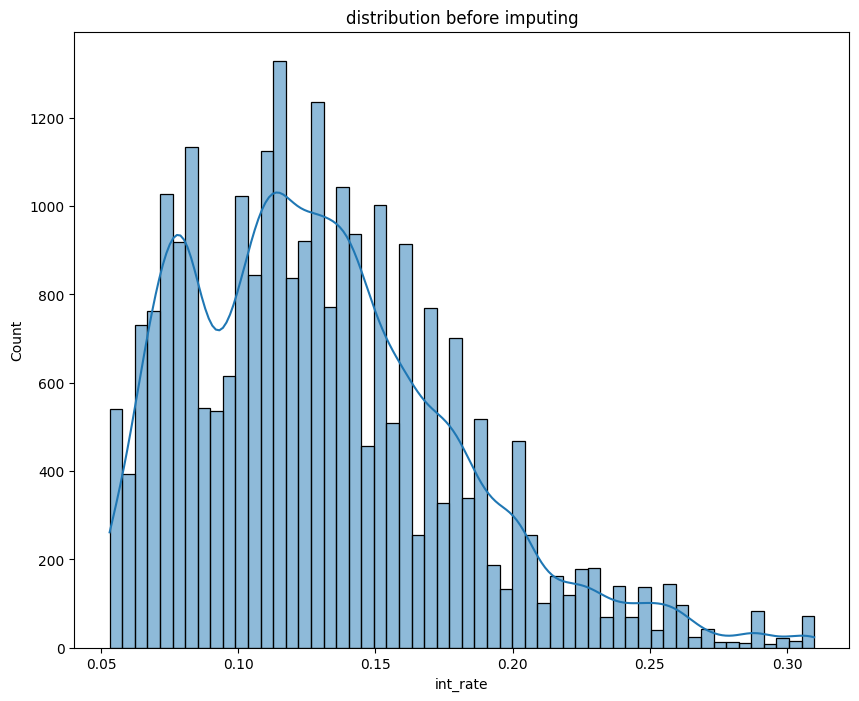

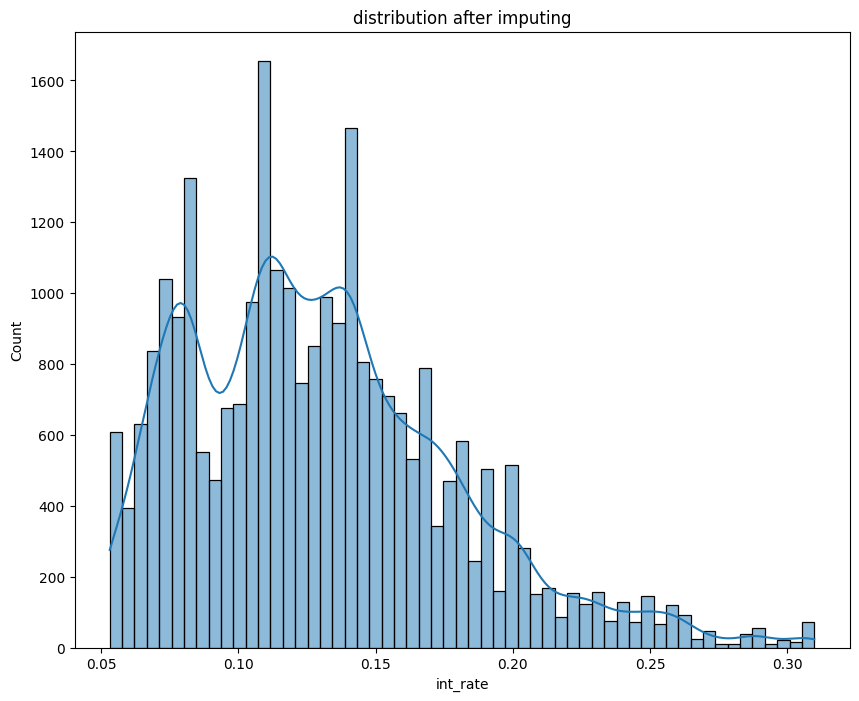

In [29]:

def handle_missing(df,col1,col2,col3,col4,emp_length_col='emp_length',grade='grade',purpose='purpose',annual_group='annual_income_grouped'):
    
    # Group by emp_title and calculate the mean annual income
    mean_salaries_by_title = df.groupby('emp_title')['annual_inc'].mean()
    title_counts = df['emp_title'].value_counts()
    plt.figure(figsize=(10, 8))
    sns.histplot(df[col2],kde=True)
    plt.title("distribution before imputing")
    # Create a lookup table for original and imputed titles
    lookup_df=df[[col2]].copy()
    lookup_df.rename(columns={col2:'original_int_rate'},inplace=True)

    lookup_df3 = df[[col1, 'annual_inc']].copy()
    lookup_df3.rename(columns={col1: 'original_emp_title'}, inplace=True)

    look_df4=df[[col3]].copy()
    look_df4.rename(columns={col3: 'original_description'},inplace = True)
    # Impute missing values in the description column
    df[col3] = df[col3].fillna(df[purpose])
    look_df4['description_imputed']=df[col3]
    look_df4.to_csv('lookup_table_description.csv', index=False)

    annual_joint_df=df[[col4]].copy()
    annual_joint_df.rename({col4:'original_annual_joint'},inplace=True)
    df[col4].fillna(0, inplace=True)
    annual_joint_df['imputed_annual_income_joint']=df[col4]
    annual_joint_df.to_csv('jointincome_looktable.csv', index=False)
    # Define the function to impute missing emp_title
    def impute_emp_title(row):
        if pd.isna(row[col1]):  # Check if emp_title is missing
            if pd.isna(row[emp_length_col]):
             return "Unemployed"
            # Calculate the absolute difference from mean salaries
            salary_diff = mean_salaries_by_title.sub(row['annual_inc']).abs()
            
            # Get the closest titles by salary
            closest_titles = salary_diff[salary_diff == salary_diff.min()].index
            
            # From these, choose the title with the highest frequency
            if len(closest_titles) > 1:
                # Filter title_counts to only consider closest_titles
                filtered_title_counts = title_counts[title_counts.index.isin(closest_titles)]
                return filtered_title_counts.idxmax()
            elif len(closest_titles) == 1:
                return closest_titles[0]

            # Fallback if no valid title is found
            return title_counts.idxmax()
        
        return row[col1]  # If not missing, return the original emp_title

    # Apply the imputation function row-wise
    df[col1] = df.apply(impute_emp_title, axis=1)
    df[col2] = df.groupby(grade)[col2].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

    # Impute 'emp_length' within each income group
    emp_length_df=df[[emp_length_col]].copy()
    emp_length_df.rename({emp_length_col:'original_emp_length'},inplace=True)
    df[emp_length_col] = df.groupby(annual_group)[emp_length_col].transform(lambda x: x.fillna(x.mode()[0]))
    emp_length_df['imputed_emp_length']=df[emp_length_col]
    emp_length_df.to_csv('emplength_looktable.csv',index=False)
    # Update the lookup table
    lookup_df['int_rate_imputed']=df[col2]
    lookup_df.to_csv('int_rate_imputed_lookup.csv', index=False)
    lookup_df3['emp_title_impute'] = df[col1]
    # Save the lookup table to a CSV file
    lookup_df3.to_csv('emp_title_lookup.csv', index=False)
    plt.figure(figsize=(10, 8))
    sns.histplot(df[col2],kde=True)
    plt.title("distribution after imputing")
    
    print("int_rate_imputed_lookup.csv saved ")
    print("emp_title_lookup.csv saved ")
    print("emplength_looktable.csv saved ")
    print("jointincome_looktable.csv saved ")
    print("lookup_table_description.csv saved ")
    return df  # Return the updated DataFrame

#This approach ensures that imputation:
#Aligns with the closest mean salary.
#Prefers the most frequent title within the group, improving data consistency.

df_fintech = handle_missing(df_fintech, 'emp_title','int_rate','description','annual_inc_joint')


In [30]:
# Comment on every feature Type of missing 
# 1- Int_rate MAR as it is obeserved relation between Int_rate and Grade 
# 2- annual_inc_joint MNAR as there is a valid reasone that the loan is an individual loan 
# 3- emp_tilte MCAR as there is no any relation only may consider that the annual income middle classes having the most values of missing data
# 4- description MCAR 
# 5- emp_length MCAR

In [31]:
df_fintech.info()

# def drop_column(column_name):
#     df_fintech.drop(columns=column_name,inplace=True)

# #Function for dropping columns 

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 27030 entries, ('YichXHg4OVx4MDMuXHgwYi9RXHhkY1x4MGZ3QFx4OTJceGUxXHg5NmJceGJkXHhjZVx4OWZceGE4XHhjMSJ4XHg5OFx4ZmFceGI0XHhiZHppJDdceDEyNyc=', np.int64(35662)) to ('YidceDFmXHgxZm5hZlx4OTNceDk3XHgwN1x4MTFceDA4SFx4YjFceDAxXHhkOCpceGE0XHhmY31ceGYzXHgxM2dceGU5XHg5OEM8Y1x4N2Y7XHhiMFx4ODRcblx4OWMn', np.int64(265260))
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   emp_title                       27030 non-null  object        
 1   emp_length                      27030 non-null  float64       
 2   home_ownership                  27030 non-null  object        
 3   annual_inc                      27030 non-null  float64       
 4   annual_inc_joint                27030 non-null  float64       
 5   verification_status             27030 non-null  object        
 6   zip_code                        27030 non-null  object   

In [32]:
mode_emp_title = df_fintech.emp_title.mode()
print(mode_emp_title)

0    Unemployed
Name: emp_title, dtype: object


Grade analysis saved to grade_analysis.csv


/var/folders/xt/0l9mqwh56cvdq97mqqhsq9c80000gn/T/ipykernel_17819/3603049515.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby([income_group_col, grade_col])
/var/folders/xt/0l9mqwh56cvdq97mqqhsq9c80000gn/T/ipykernel_17819/3603049515.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(income_group_col)


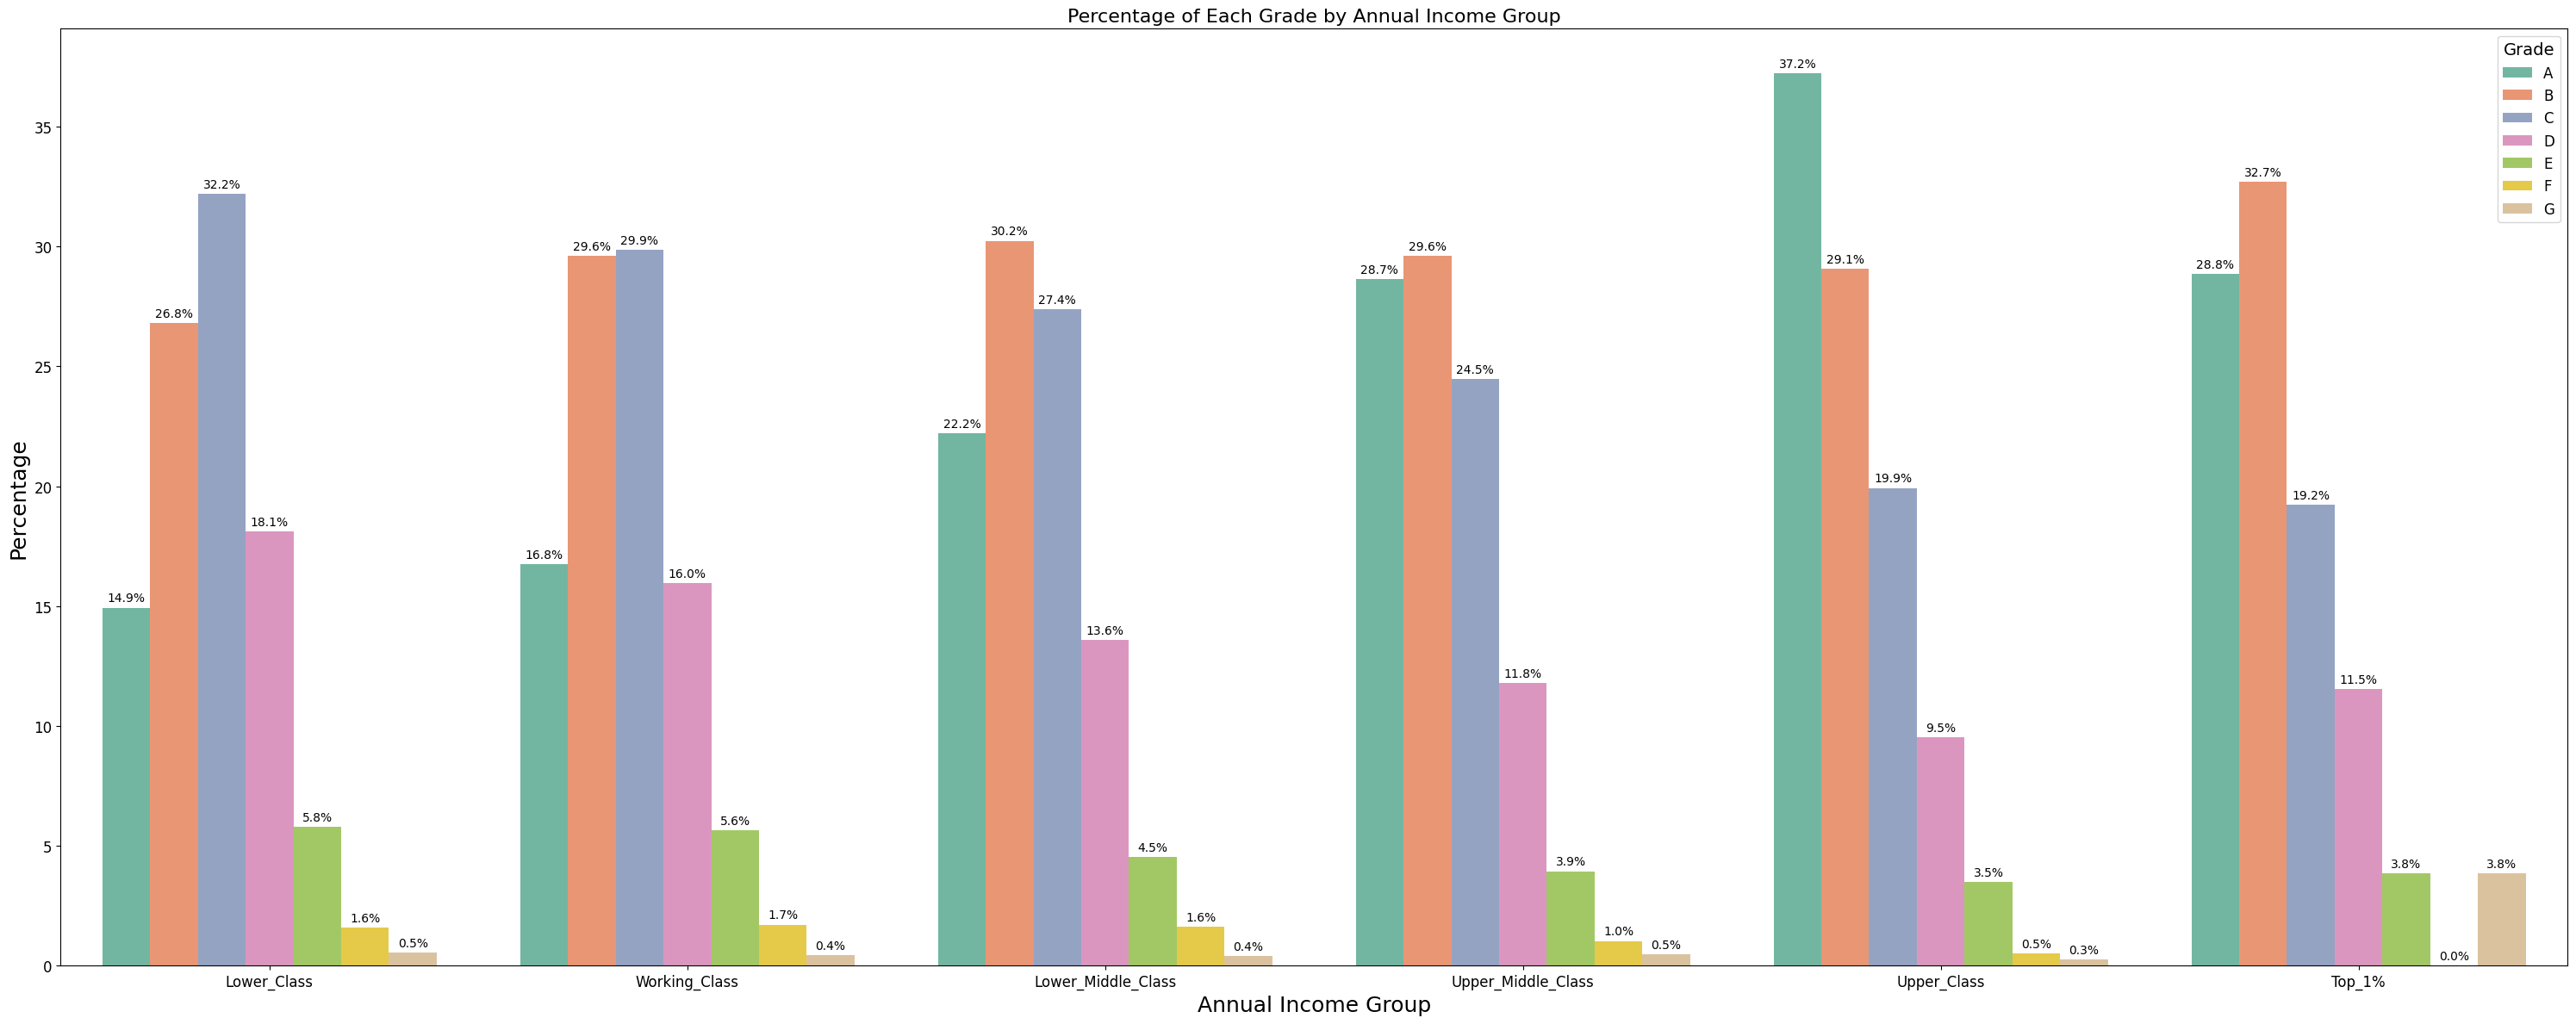

In [33]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def grade_analysis(df, income_group_col, grade_col):
    """
    Calculates the percentage of each grade within each annual income group and plots the results.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the columns.
    income_group_col (str): The name of the column representing annual income groups.
    grade_col (str): The name of the column representing grades.

    Returns:
    pd.DataFrame: A DataFrame with annual income groups, grades, and their percentages.
    """
    # Check if the specified columns exist in the DataFrame
    if income_group_col not in df.columns or grade_col not in df.columns:
        raise ValueError(f"Columns '{income_group_col}' or '{grade_col}' not found in the DataFrame.")
    
    # Calculate count of grades within each income group
    grade_counts = (
        df.groupby([income_group_col, grade_col])
        .size()
        .rename("count")
        .reset_index()
    )

    # Calculate total count of all grades per income group
    total_counts = (
        df.groupby(income_group_col)
        .size()
        .rename("total_count")
        .reset_index()
    )

    # Merge grade counts with total counts
    merged = pd.merge(grade_counts, total_counts, on=income_group_col)

    # Calculate percentage
    merged["percentage"] = (merged["count"] / merged["total_count"]) * 100

    # Sort for better readability
    merged = merged.sort_values(by=[income_group_col, grade_col]).reset_index(drop=True)
    merged.to_csv('grade_analysis.csv', index=False)
    print(f"Grade analysis saved to {'grade_analysis.csv'}")
    # Plot the results
    plt.figure(figsize=(30, 12))
    barplot = sns.barplot(
        data=merged,
        x=income_group_col,
        y="percentage",
        hue=grade_col,
        palette="Set2"
    )

    # Add percentages above bars
    for container in barplot.containers:
        barplot.bar_label(
            container,
            fmt='%.1f%%',
            label_type='edge',
            fontsize=10,
            padding=3
        )

    # Customize plot
    plt.title("Percentage of Each Grade by Annual Income Group", fontsize=16)
    plt.xlabel("Annual Income Group", fontsize=18)
    plt.ylabel("Percentage", fontsize=18)
    plt.xticks(rotation=0, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title="Grade", fontsize=12, title_fontsize=14)
    plt.tight_layout()
    plt.show()

grade_analysis(df_fintech,'annual_income_grouped','grade_grouped')


In [34]:
def null_values(df,colname):
    sum_null = df[colname].isnull().sum()
    perc_null_mean = df[colname].isnull().mean()*100
    print("this is sum of null values:",sum_null)
    print("this percentage of null values:",perc_null_mean)

# function For num of null values and percantage 

In [35]:
# emp_length 
null_values(df_fintech,'emp_length')
#plot_column('emp_length')

this is sum of null values: 0
this percentage of null values: 0.0


# **salary_can_cover function key advantages** 

In [36]:
def salary_can_cover(df, P='funded_amount', term_column='term'):
    """
    Calculates the monthly installment for each loan and determines if the borrower's salary can cover it.

    Args:
        df: The input DataFrame containing loan details.
        P: The loan principal/amount (funded amount). Default is 'funded_amount'.
        term_column: The column name containing the term of the loan in months. Default is 'term'.

    Returns:
        A modified DataFrame with two new columns:
        - 'Installment_per_month': Monthly installment for the loan.
        - 'salary_can_cover': Boolean column indicating if annual income can cover yearly installments.
    """
    # Calculate monthly interest rate
    df['monthly_interest_rate'] = df['int_rate'] / 12  

    # Calculate monthly installment
    df['Installment_per_month'] = df.apply(
        lambda row: (
            (row[P] * row['monthly_interest_rate'] * (1 + row['monthly_interest_rate']) ** row[term_column])
            / ((1 + row['monthly_interest_rate']) ** row[term_column] - 1)
        ) if row['monthly_interest_rate'] > 0 else row[P] / row[term_column],
        axis=1
    )

    # Determine if the borrower's salary can cover yearly installments
    df['salary_can_cover'] = (df['annual_inc'] >= df['Installment_per_month'] * 12)

    # Create a lookup DataFrame with the required columns
    lookup_df = df[['Installment_per_month', 'salary_can_cover']]

    # Save the lookup DataFrame to a CSV file
    lookup_df.to_csv('Installmentpermonth_Salarycancover.csv', index=False)
    print(df.groupby('salary_can_cover')['annual_income_grouped'].value_counts())

salary_can_cover(df_fintech)

salary_can_cover  annual_income_grouped
False             Lower_Class                 14
                  Working_Class                0
                  Lower_Middle_Class           0
                  Upper_Middle_Class           0
                  Upper_Class                  0
                  Top_1%                       0
True              Lower_Middle_Class       10061
                  Working_Class             8152
                  Upper_Middle_Class        5396
                  Lower_Class               2557
                  Upper_Class                798
                  Top_1%                      52
Name: count, dtype: int64


In [37]:
df_fintech.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 27030 entries, ('YichXHg4OVx4MDMuXHgwYi9RXHhkY1x4MGZ3QFx4OTJceGUxXHg5NmJceGJkXHhjZVx4OWZceGE4XHhjMSJ4XHg5OFx4ZmFceGI0XHhiZHppJDdceDEyNyc=', np.int64(35662)) to ('YidceDFmXHgxZm5hZlx4OTNceDk3XHgwN1x4MTFceDA4SFx4YjFceDAxXHhkOCpceGE0XHhmY31ceGYzXHgxM2dceGU5XHg5OEM8Y1x4N2Y7XHhiMFx4ODRcblx4OWMn', np.int64(265260))
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   emp_title                       27030 non-null  object        
 1   emp_length                      27030 non-null  float64       
 2   home_ownership                  27030 non-null  object        
 3   annual_inc                      27030 non-null  float64       
 4   annual_inc_joint                27030 non-null  float64       
 5   verification_status             27030 non-null  object        
 6   zip_code                        27030 non-null  object   

In [38]:
df_fintech.groupby('salary_can_cover')['annual_income_grouped'].value_counts()

salary_can_cover  annual_income_grouped
False             Lower_Class                 14
                  Working_Class                0
                  Lower_Middle_Class           0
                  Upper_Middle_Class           0
                  Upper_Class                  0
                  Top_1%                       0
True              Lower_Middle_Class       10061
                  Working_Class             8152
                  Upper_Middle_Class        5396
                  Lower_Class               2557
                  Upper_Class                798
                  Top_1%                      52
Name: count, dtype: int64

In [39]:
df_fintech['type'].value_counts()

type
Individual    25179
Joint App      1822
Direct Pay       29
Name: count, dtype: int64

In [40]:
#df_fintech = pd.get_dummies(df_fintech, columns=['loan_status'], prefix='loan_status', dtype=int)

In [41]:
#df_fintech.head()

# **Bonus Task** :
Enrich the DataFrame by adding a new column named 'state_name' that contains the corresponding full names of the states.

In [42]:
import requests


def add_state_names(df):

    # 1. Fetch state names from FreeTestAPI
    url = "https://freetestapi.com/api/v1/us-states"
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception("Failed to fetch state data from FreeTestAPI.")
    states = response.json()
    state_lookup = {state['abbreviation']: state['name'] for state in states}

    # 2. Fetch state data from Statistics Canada
    statcan_url = "https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=53971"
    statcan_df = pd.read_html(statcan_url)[0]  # the data is in the first table
    statcan_df.columns = ['Code', 'State', 'Abbreviation', 'Alpha code']  # Set column names
    statcan_lookup = dict(zip(statcan_df['Alpha code'], statcan_df['State']))

    # 3. Convert 'state' column values to uppercase
    df['state'] = df['state'].str.upper()

    # 4. Map state abbreviations to full names
    df['state_name'] = df['state'].map(state_lookup)

    # 5. Enhance state names with Statistics Canada data if available
    df['state_name'] = df['state'].map(statcan_lookup).fillna(df['state_name'])

    df[['state','state_name']].to_csv('state_names.csv', index=False)
    print("State names saved to state_names.csv")

# Add full state names to your dataframe
add_state_names(df_fintech)

State names saved to state_names.csv


In [43]:
df_fintech.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 27030 entries, ('YichXHg4OVx4MDMuXHgwYi9RXHhkY1x4MGZ3QFx4OTJceGUxXHg5NmJceGJkXHhjZVx4OWZceGE4XHhjMSJ4XHg5OFx4ZmFceGI0XHhiZHppJDdceDEyNyc=', np.int64(35662)) to ('YidceDFmXHgxZm5hZlx4OTNceDk3XHgwN1x4MTFceDA4SFx4YjFceDAxXHhkOCpceGE0XHhmY31ceGYzXHgxM2dceGU5XHg5OEM8Y1x4N2Y7XHhiMFx4ODRcblx4OWMn', np.int64(265260))
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   emp_title                       27030 non-null  object        
 1   emp_length                      27030 non-null  float64       
 2   home_ownership                  27030 non-null  object        
 3   annual_inc                      27030 non-null  float64       
 4   annual_inc_joint                27030 non-null  float64       
 5   verification_status             27030 non-null  object        
 6   zip_code                        27030 non-null  object   

In [44]:
df_fintech.head()

,,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description,issue_year,issue_month,grade_grouped,annual_income_grouped,Verification_Status_Encoded,Encoded_home_ownership,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),monthly_interest_rate,Installment_per_month,salary_can_cover,state_name
customer_id,loan_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
YichXHg4OVx4MDMuXHgwYi9RXHhkY1x4MGZ3QFx4OTJceGUxXHg5NmJceGJkXHhjZVx4OWZceGE4XHhjMSJ4XHg5OFx4ZmFceGI0XHhiZHppJDdceDEyNyc=,35662,VanVarick and Sons,5.0,RENT,50000.0,0.0,Not Verified,074xx,NJ,2174,13043,Fully Paid,5325,NJ,5325,36,0.1629,12,2012-08-12,False,Individual,debt_consolidation,credit card consolidation,2012,8,C,Working_Class,0,1,0,0,0,1,0,0,0,0.013575,187.974494,True,New Jersey
Yic7XHhhNFx4OTZTXHhkM1x4Y2RceGE2XHhhNCtcblx4OWFceGY3Ylx4ZDBceGRjXHhlNFx4ZWRceDhmR1x4OWZGXHgxNFx4MDVceDAyM1x4MDBPXHhkMm5ceGFhd1x4YTYn,153163,Woodruff-Sawyer & Co.,6.0,RENT,94000.0,0.0,Source Verified,926xx,CA,2493,17448,Fully Paid,15000,CA,15000,36,0.1580,13,2012-08-12,False,Individual,wedding,Wedding,2012,8,C,Lower_Middle_Class,2,1,0,0,0,1,0,0,0,0.013167,525.875586,True,California
YidceDgze19ceDBlXHhiOVx4YzNceDAzXHhmOVtMXkRSOVx4ZjNceGY3K1x4ZTlceGQ1XHhkYlx4YmVceGZmXHgwODJceGE4XHhkOVx4YTJceDk3XHhkNlx4Y2FceDBmXHhiYSc=,162087,comcast,10.0,MORTGAGE,50000.0,0.0,Not Verified,349xx,FL,17956,161608,Fully Paid,16000,FL,16000,36,0.1409,9,2012-08-12,False,Individual,credit_card,debt help,2012,8,B,Working_Class,0,0,0,0,0,1,0,0,0,0.011742,547.541731,True,Florida
YiJvXHhjMUNceDg5XHhmZFx4ZTVceGY2QU9ceDAzXHhjYlx4MGUvXHhkZFx4YThYXHhhY1x4MWJceDhhJ1x4ZjNceGYxdVx4ODBceGMxXHhjNVx4YjNceDFhXHhmNiAlXHg4MSI=,18218,COUNTY OF SAN DIEGO,8.0,RENT,48000.0,0.0,Not Verified,920xx,CA,2976,17855,Charged Off,4000,CA,4000,36,0.1114,9,2012-08-12,False,Individual,debt_consolidation,LENDING,2012,8,B,Working_Class,0,1,1,0,0,0,0,0,0,0.009283,131.220223,True,California
YidceGQxXHhmZlx4YjBLXHgxZlx4Zjc3dlx4ODEhXHhhZVx4OTF9XHgwZVx4ZDhceDEwcFx4YTUjRVx4MDFGXHg5YUJLU1x4ZDVZPFx4MWRoXHhlNyc=,203070,Keller ISD,10.0,MORTGAGE,51827.0,0.0,Verified,761xx,TX,16660,149936,Fully Paid,20425,TX,20425,60,0.1727,14,2012-08-12,False,Individual,debt_consolidation,Goodbye Credit Cards,2012,8,C,Working_Class,1,0,0,0,0,1,0,0,0,0.014392,510.583825,True,Texas


# **Outliers Study**

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import pandas as pd

def detect_outliers_iqr_with_plot_and_save(df, column, output_dir="./"):
    """
    Detects outliers using the IQR method, visualizes a box plot, prints the percentage of outliers,
    and saves the outliers to a CSV file.

    Args:
        df (pd.DataFrame): Input DataFrame.
        column (str): Column name to detect outliers for.
        output_dir (str): Directory to save the outlier CSV files.

    Returns:
        pd.DataFrame: DataFrame of outliers.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df)) * 100

    # Print outlier percentage
    print(f"IQR Method: {outlier_percentage:.2f}% of '{column}' values are outliers.")

    # Save outliers to CSV
    outliers_file = f"{output_dir}IQR_Outliers_{column}.csv"
    outliers.to_csv(outliers_file, index=False)
    print(f"Outliers saved to: {outliers_file}")

    # Box plot
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[column])
    plt.title(f"Box Plot for '{column}' (IQR Method)")
    plt.show()

  


def detect_outliers_zscore_with_plot_and_save(df, column, threshold=3, output_dir="./"):
    """
    Detects outliers using the Z-Score method, visualizes a box plot, prints the percentage of outliers,
    and saves the outliers to a CSV file.

    Args:
        df (pd.DataFrame): Input DataFrame.
        column (str): Column name to detect outliers for.
        threshold (float): Z-score threshold for identifying outliers.
        output_dir (str): Directory to save the outlier CSV files.

    Returns:
        pd.DataFrame: DataFrame of outliers.
    """
    df['zscore'] = zscore(df[column])
    outliers = df[(df['zscore'] < -threshold) | (df['zscore'] > threshold)]
    outlier_percentage = (len(outliers) / len(df)) * 100

    # Print outlier percentage
    print(f"Z-Score Method: {outlier_percentage:.2f}% of '{column}' values are outliers.")

    # Save outliers to CSV
    outliers_file = f"{output_dir}ZScore_Outliers_{column}.csv"
    outliers.to_csv(outliers_file, index=False)
    print(f"Outliers saved to: {outliers_file}")

    # Box plot
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[column])
    plt.title(f"Box Plot for '{column}' (Z-Score Method)")
    plt.show()




IQR Method: 5.08% of 'annual_inc' values are outliers.
Outliers saved to: ./IQR_Outliers_annual_inc.csv


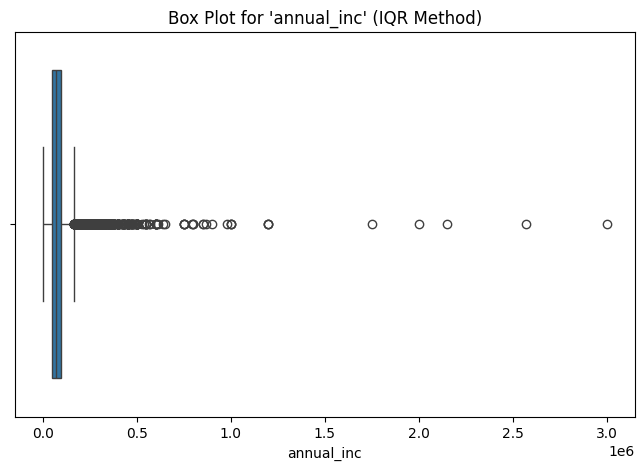

In [46]:
detect_outliers_iqr_with_plot_and_save(df_fintech,'annual_inc')

Z-Score Method: 1.12% of 'annual_inc' values are outliers.
Outliers saved to: ./ZScore_Outliers_annual_inc.csv


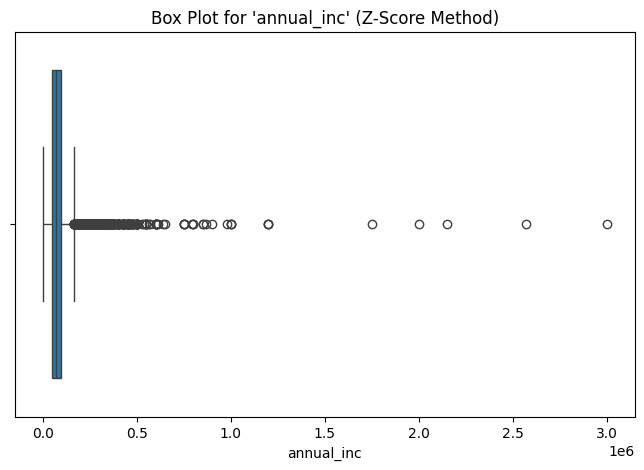

In [47]:
detect_outliers_zscore_with_plot_and_save(df_fintech,'annual_inc',threshold=3)


IQR Method: 2.44% of 'loan_amount' values are outliers.
Outliers saved to: ./IQR_Outliers_loan_amount.csv


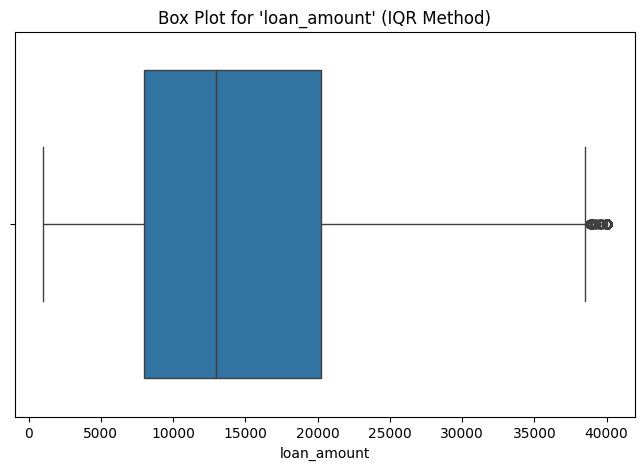

In [48]:
detect_outliers_iqr_with_plot_and_save(df_fintech,'loan_amount')


Z-Score Method: 2.37% of 'loan_amount' values are outliers.
Outliers saved to: ./ZScore_Outliers_loan_amount.csv


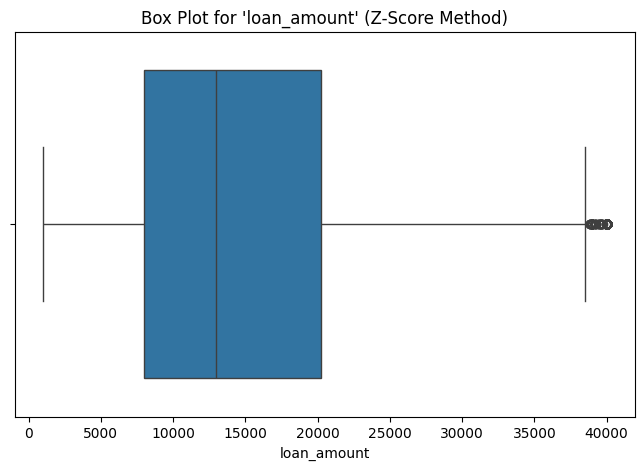

In [49]:
detect_outliers_zscore_with_plot_and_save(df_fintech,'loan_amount',threshold=2.5)

IQR Method: 5.42% of 'avg_cur_bal' values are outliers.
Outliers saved to: ./IQR_Outliers_avg_cur_bal.csv


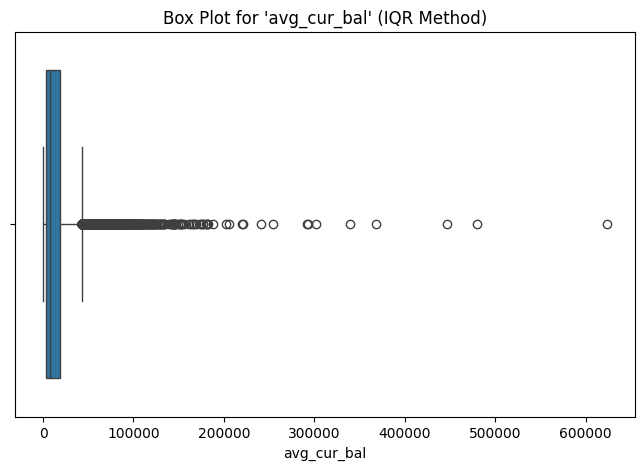

In [50]:
detect_outliers_iqr_with_plot_and_save(df_fintech,'avg_cur_bal')

Z-Score Method: 1.53% of 'avg_cur_bal' values are outliers.
Outliers saved to: ./ZScore_Outliers_avg_cur_bal.csv


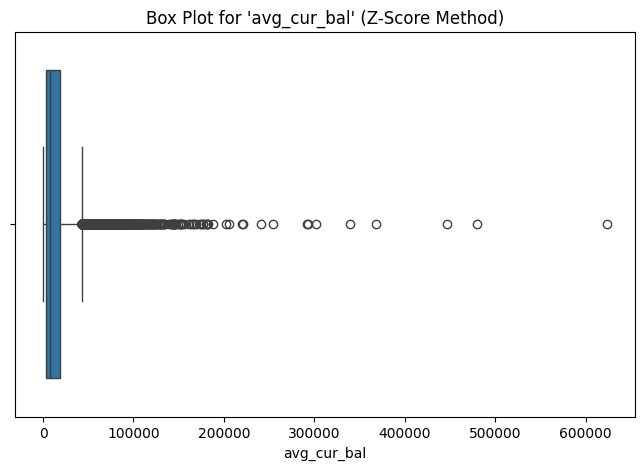

In [51]:
detect_outliers_zscore_with_plot_and_save(df_fintech,'avg_cur_bal', threshold=3)

# **Applying log transformation**

In [52]:
import pandas as pd
import numpy as np

def apply_log_transformation(df, column_names, output_dir="./"):
    """
    Applies log transformation to specified columns in the DataFrame.
    Saves the transformed columns to separate CSV files.

    Args:
        df (pd.DataFrame): Input DataFrame.
        column_names (list of str): List of column names to transform.
        output_dir (str): Directory to save the transformed columns.

    Returns:
        pd.DataFrame: DataFrame with new log-transformed columns added.
    """
    import os
    os.makedirs(output_dir, exist_ok=True)

    for column in column_names:
        if column not in df.columns:
            print(f"Column '{column}' not found in DataFrame. Skipping.")
            continue

        # Apply safe log transformation
        transformed_column_name = f"{column}_log"
        df[transformed_column_name] = np.log1p(df[column])  # log1p handles zero values

        # Save the transformed column to a CSV
        file_name = f"{transformed_column_name}_transformed.csv"
        df[[column, transformed_column_name]].to_csv(os.path.join(output_dir, file_name), index=False)
        print(f"Log-transformed column '{transformed_column_name}' saved to {file_name}")

apply_log_transformation(df_fintech,['loan_amount', 'avg_cur_bal','annual_inc'],output_dir="./log_transformed_columns")


Log-transformed column 'loan_amount_log' saved to loan_amount_log_transformed.csv
Log-transformed column 'avg_cur_bal_log' saved to avg_cur_bal_log_transformed.csv
Log-transformed column 'annual_inc_log' saved to annual_inc_log_transformed.csv


# **Checking Outliers After transformation**

IQR Method: 2.02% of 'annual_inc_log' values are outliers.
Outliers saved to: ./outliers_after_log_transformed_columnsIQR_Outliers_annual_inc_log.csv


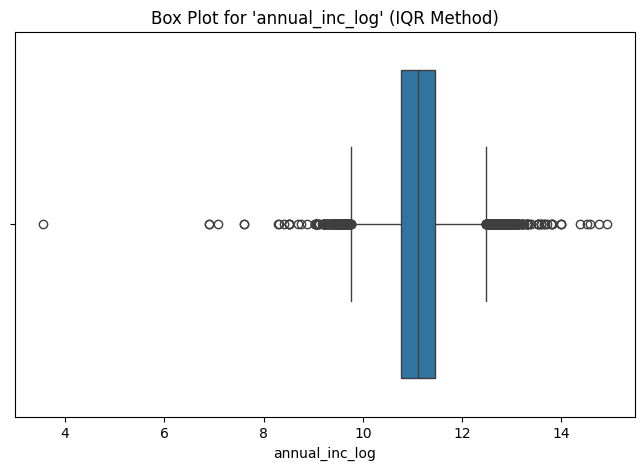

In [53]:
detect_outliers_iqr_with_plot_and_save(df_fintech,'annual_inc_log',output_dir="./outliers_after_log_transformed_columns")

Z-Score Method: 0.78% of 'annual_inc_log' values are outliers.
Outliers saved to: ./outliers_after_log_transformed_columnsZScore_Outliers_annual_inc_log.csv


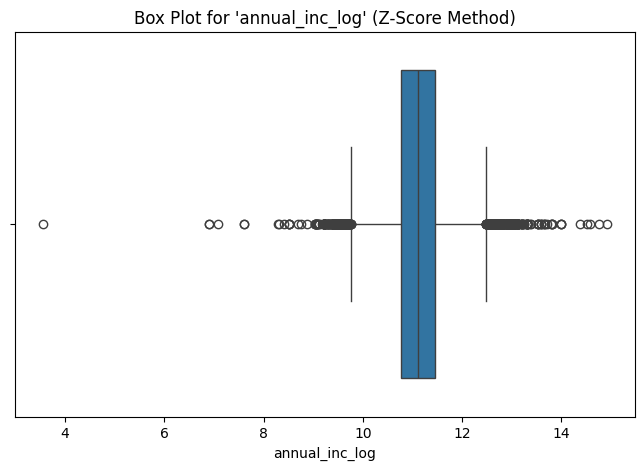

In [54]:
detect_outliers_zscore_with_plot_and_save(df_fintech,'annual_inc_log',output_dir="./outliers_after_log_transformed_columns")

In [55]:
df_fintech.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 27030 entries, ('YichXHg4OVx4MDMuXHgwYi9RXHhkY1x4MGZ3QFx4OTJceGUxXHg5NmJceGJkXHhjZVx4OWZceGE4XHhjMSJ4XHg5OFx4ZmFceGI0XHhiZHppJDdceDEyNyc=', np.int64(35662)) to ('YidceDFmXHgxZm5hZlx4OTNceDk3XHgwN1x4MTFceDA4SFx4YjFceDAxXHhkOCpceGE0XHhmY31ceGYzXHgxM2dceGU5XHg5OEM8Y1x4N2Y7XHhiMFx4ODRcblx4OWMn', np.int64(265260))
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   emp_title                       27030 non-null  object        
 1   emp_length                      27030 non-null  float64       
 2   home_ownership                  27030 non-null  object        
 3   annual_inc                      27030 non-null  float64       
 4   annual_inc_joint                27030 non-null  float64       
 5   verification_status             27030 non-null  object        
 6   zip_code                        27030 non-null  object   

# *Scaling numerical functions that need to be scaled*


In [56]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

def scale_numerical_columns(df, output_dir="./"):
    """
    Automatically identifies numerical columns in the DataFrame and scales them using StandardScaler.
    Saves the scaled dataset to a CSV file.

    Args:
        df (pd.DataFrame): Input DataFrame to be scaled.
        output_dir (str): Directory to save the scaled dataset.

    Returns:
        pd.DataFrame: DataFrame with scaled numerical columns.
    """
    import os
    os.makedirs(output_dir, exist_ok=True)
    
    # Identify numerical columns in the DataFrame
    numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
    if not numerical_columns:
        raise ValueError("No numerical columns found in the DataFrame to scale.")
    
    # Initialize the StandardScaler
    scaler = StandardScaler()
    
    # Scale the numerical columns
    scaled_data = scaler.fit_transform(df[numerical_columns])
    scaled_df = pd.DataFrame(scaled_data, columns=[f"{col}_scaled" for col in numerical_columns], index=df.index)
    
    # Merge scaled columns with the original DataFrame
    df_scaled = pd.concat([df, scaled_df], axis=1)
    
    # Save the scaled dataset
    file_name = "scaled_dataset.csv"
    output_path = os.path.join(output_dir, file_name)
    df_scaled.to_csv(output_path, index=False)
    print(f"Scaled dataset saved to {output_path}")
scale_numerical_columns(df_fintech)

Scaled dataset saved to ./scaled_dataset.csv
